# Get Data

In [2]:
import numpy as np

# Define the file path
file_path = "../../../MLTM/SDGs/test-label.dat"  # Replace with the actual path to your file

# Read data from the file and convert it into true_labels
true_labels = []
with open(file_path, "r") as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing white spaces
        line_data = list(map(int, line.split()))  # Split and convert to integers
        true_labels.append(line_data)

# Convert the list of lists into a numpy array
true_labels = np.array(true_labels)

In [3]:
true_labels

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
import numpy as np

# Define the file path
file_path = "../../../MLTM/SDGs/1/1/dir/testfinal.b"  # Replace with the actual path to your file

# Read data from the file and convert it into true_labels
predicted_probs = []
with open(file_path, "r") as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing white spaces
        line_data = list(map(float, line.split()))  # Split and convert to integers
        predicted_probs.append(line_data)

# Convert the list of lists into a numpy array
predicted_probs = np.array(predicted_probs)


In [5]:
predicted_probs

array([[7.49906300e-04, 4.99937500e-04, 4.99937500e-04, ...,
        6.24921900e-04, 9.47756530e-01, 4.99937500e-04],
       [7.22409699e-02, 1.17485314e-02, 4.37445320e-03, ...,
        3.79952506e-02, 7.79902512e-01, 9.99875000e-04],
       [1.74978130e-03, 4.99937500e-04, 1.74978130e-03, ...,
        2.49968750e-03, 6.61417323e-01, 4.37445320e-03],
       ...,
       [2.65466817e-01, 2.49968800e-04, 0.00000000e+00, ...,
        3.74953100e-04, 4.99937500e-04, 3.74953100e-04],
       [3.49956260e-03, 1.31233596e-02, 8.49893760e-03, ...,
        1.99975000e-03, 3.12460940e-03, 1.99975000e-03],
       [2.49968750e-03, 3.74953100e-04, 2.74965630e-03, ...,
        7.49906300e-04, 4.49943760e-03, 1.74978130e-03]])

In [6]:
import numpy as np

# Define the file path
file_path = "predicted_probs.txt"  # Replace with the actual path to your file

# Read data from the file and convert it into true_labels
bert_probs = []
with open(file_path, "r") as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing white spaces
        line_data = list(map(float, line.split()))  # Split and convert to integers
        bert_probs.append(line_data)

# Convert the list of lists into a numpy array
bert_probs = np.array(bert_probs)


In [7]:
bert_probs

array([[0.002165, 0.002991, 0.00321 , ..., 0.003536, 0.967788, 0.001961],
       [0.003795, 0.00227 , 0.003473, ..., 0.002862, 0.947152, 0.003112],
       [0.002631, 0.002891, 0.003273, ..., 0.002888, 0.972064, 0.001958],
       ...,
       [0.95349 , 0.015354, 0.024014, ..., 0.032001, 0.012369, 0.027374],
       [0.021437, 0.009578, 0.005121, ..., 0.005769, 0.008345, 0.004639],
       [0.020053, 0.010131, 0.005102, ..., 0.00554 , 0.008664, 0.004678]])

In [8]:
threshold = 0.5 

# Convert to binary array using the threshold
predicted_labels = (predicted_probs >= threshold).astype(int)
bert_labels = (bert_probs >= threshold).astype(int)

In [9]:
predicted_labels

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
bert_labels

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# AGreement

In [11]:
print(len(true_labels))
print(len(predicted_labels))
print(len(bert_labels))

1537
1537
1537


In [12]:
true_data = []
pred_data = []
bert_data = []

for i, (true_row, pred_row, bert_row) in enumerate(zip(true_labels, predicted_labels, bert_labels)):
    true_indices = frozenset(index for index, value in enumerate(true_row) if value == 1)
    pred_indices = frozenset(index for index, value in enumerate(pred_row) if value == 1)
    bert_indices = frozenset(index for index, value in enumerate(bert_row) if value == 1)
    
    true_data.append(["1", i, true_indices])
    pred_data.append(["2", i, pred_indices])
    bert_data.append(["3", i, bert_indices])

In [13]:
import nltk
from nltk.metrics import masi_distance, binary_distance

In [14]:
atask = nltk.agreement.AnnotationTask(data=[('c1', '1', 1),('c2', '1', 1)])
atask.alpha()

1

In [15]:
mltm_agreement = nltk.agreement.AnnotationTask(data=true_data+pred_data, distance=binary_distance)
print(mltm_agreement.kappa())

0.40859482869441494


In [16]:
bert_agreement = nltk.agreement.AnnotationTask(data=true_data+bert_data, distance=binary_distance)
print(bert_agreement.kappa())

0.7671906258677967


# MLTM

In [17]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(true_labels, predicted_labels)


array([[[1456,    4],
        [  33,   44]],

       [[1439,    6],
        [  72,   20]],

       [[1439,    6],
        [  16,   76]],

       [[1419,    2],
        [  12,  104]],

       [[1444,    0],
        [  64,   29]],

       [[1441,    1],
        [  74,   21]],

       [[1476,    7],
        [  14,   40]],

       [[1349,   13],
        [  61,  114]],

       [[1342,   16],
        [  77,  102]],

       [[1416,    8],
        [  89,   24]],

       [[1410,    0],
        [ 127,    0]],

       [[1470,    2],
        [  53,   12]],

       [[1312,   16],
        [ 142,   67]],

       [[1470,    4],
        [  25,   38]],

       [[1407,    6],
        [  43,   81]],

       [[1353,    8],
        [  76,  100]],

       [[1403,    6],
        [  81,   47]]])

In [18]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.92      0.57      0.70        77
           1       0.77      0.22      0.34        92
           2       0.93      0.83      0.87        92
           3       0.98      0.90      0.94       116
           4       1.00      0.31      0.48        93
           5       0.95      0.22      0.36        95
           6       0.85      0.74      0.79        54
           7       0.90      0.65      0.75       175
           8       0.86      0.57      0.69       179
           9       0.75      0.21      0.33       113
          10       0.00      0.00      0.00       127
          11       0.86      0.18      0.30        65
          12       0.81      0.32      0.46       209
          13       0.90      0.60      0.72        63
          14       0.93      0.65      0.77       124
          15       0.93      0.57      0.70       176
          16       0.89      0.37      0.52       128

   micro avg       0.90   

/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:

from sklearn.metrics import classification_report, accuracy_score, hamming_loss

# Assuming you have true_labels and predicted_labels defined
# Calculate classification report using macro-averaging
report = classification_report(
    true_labels,
    predicted_labels,
    output_dict=True
)

accuracy = accuracy_score(true_labels, predicted_labels)
h_loss = hamming_loss(true_labels, predicted_labels)


# Extract micro-averaged precision, recall, and F1-score
micro_precision = report['micro avg']['precision']
micro_recall = report['micro avg']['recall']
micro_f1 = report['micro avg']['f1-score']

# Extract macro-averaged precision, recall, and F1-score
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']

# Print the results
print(f"Micro Precision: {micro_precision:.2f}")
print(f"Micro Recall: {micro_recall:.2f}")
print(f"Micro F1-Score: {micro_f1:.2f}")
print(f"Macro Precision: {macro_precision:.2f}")
print(f"Macro Recall: {macro_recall:.2f}")
print(f"Macro F1-Score: {macro_f1:.2f}")

print(f"Accuracy: {accuracy:.2f}")
print(f"Hamming Loss: {h_loss:.2f}")


def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

print('Hamming score: {0}'.format(hamming_score(true_labels, predicted_labels))) # 0.375 (= (0.5+1+0+0)/4)

Micro Precision: 0.90
Micro Recall: 0.46
Micro F1-Score: 0.61
Macro Precision: 0.84
Macro Recall: 0.47
Macro F1-Score: 0.57
Accuracy: 0.43
Hamming Loss: 0.04
Hamming score: 0.49018651051832574


/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Draw AUROC

In [20]:
import numpy as np
from sklearn.metrics import roc_auc_score


# Calculate ROC AUC for each class and skip classes with only one class in y_true
roc_auc_scores = []
for i in range(true_labels.shape[1]):
    if len(np.unique(true_labels[:, i])) > 1:
        roc_auc = roc_auc_score(true_labels[:, i], predicted_probs[:, i])
        roc_auc_scores.append(roc_auc)

# Calculate micro and macro average ROC AUC
micro_roc_auc = roc_auc_score(true_labels.ravel(), predicted_probs.ravel(), average='micro')
macro_roc_auc = np.mean(roc_auc_scores)

print("ROC AUC Scores for Each Class:")
for i, score in enumerate(roc_auc_scores):
    print(f"Class {i}: {score:.4f}")

print(f"Micro ROC AUC: {micro_roc_auc:.4f}")
print(f"Macro ROC AUC: {macro_roc_auc:.4f}")


ROC AUC Scores for Each Class:
Class 0: 0.9886
Class 1: 0.9208
Class 2: 0.9891
Class 3: 0.9954
Class 4: 0.9644
Class 5: 0.9683
Class 6: 0.9532
Class 7: 0.9815
Class 8: 0.9659
Class 9: 0.9077
Class 10: 0.9242
Class 11: 0.9374
Class 12: 0.9131
Class 13: 0.9835
Class 14: 0.9936
Class 15: 0.9902
Class 16: 0.9804
Micro ROC AUC: 0.9709
Macro ROC AUC: 0.9622


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score


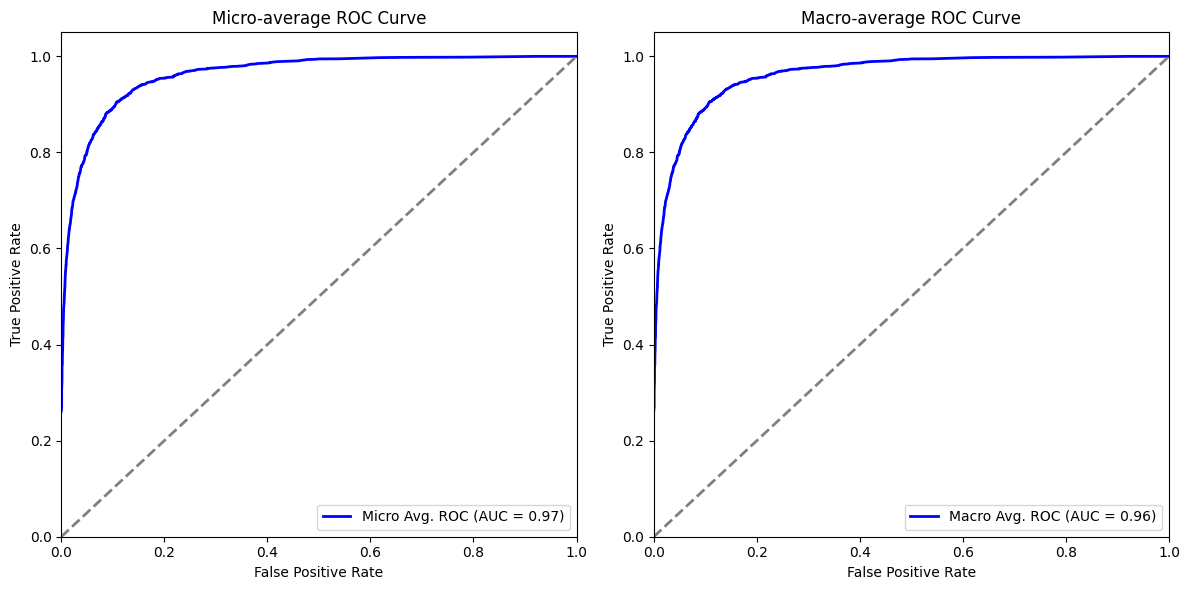

In [22]:
# Calculate micro-average ROC AUC score
roc_auc_micro = roc_auc_score(true_labels, predicted_probs, average='micro')

# Calculate macro-average ROC curve
n_classes = true_labels.shape[1]
all_fpr = []
all_tpr = []
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    all_fpr.append(fpr)
    all_tpr.append(tpr)

# Interpolate all ROC curves to create a common set of points for mean calculation
mean_fpr = np.unique(np.concatenate(all_fpr))
mean_tpr = np.zeros_like(mean_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, all_fpr[i], all_tpr[i])

mean_tpr /= n_classes

# Calculate macro-average ROC AUC score
roc_auc_macro = auc(mean_fpr, mean_tpr)

# Create two subplots
plt.figure(figsize=(12, 6))

# Plot micro-average ROC curve
plt.subplot(1, 2, 1)
plt.plot(mean_fpr, mean_tpr, color='blue', linestyle='-', lw=2, label=f'Micro Avg. ROC (AUC = {roc_auc_micro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend(loc="lower right")

# Plot macro-average ROC curve
plt.subplot(1, 2, 2)
plt.plot(mean_fpr, mean_tpr, color='blue', linestyle='-', lw=2, label=f'Macro Avg. ROC (AUC = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC Curve')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [23]:
n_classes

17

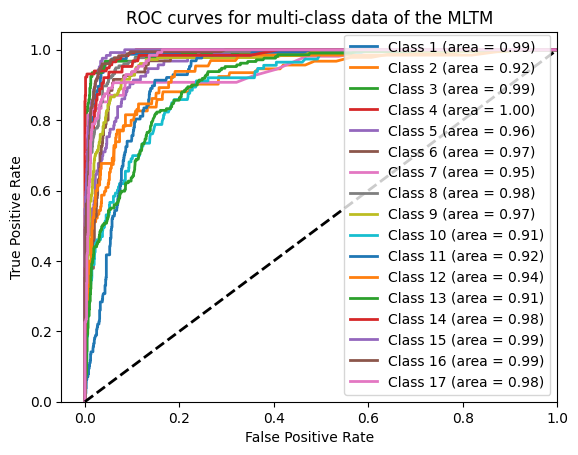

In [24]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the MLTM')
plt.legend(loc="lower right")
plt.savefig('roc1.png', format='png', dpi=1200)
plt.show()

# BERT

In [25]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(true_labels, bert_labels)

array([[[1453,    7],
        [   6,   71]],

       [[1432,   13],
        [  25,   67]],

       [[1443,    2],
        [   5,   87]],

       [[1419,    2],
        [   1,  115]],

       [[1432,   12],
        [  11,   82]],

       [[1420,   22],
        [  25,   70]],

       [[1481,    2],
        [   5,   49]],

       [[1352,   10],
        [  15,  160]],

       [[1347,   11],
        [  18,  161]],

       [[1392,   32],
        [  21,   92]],

       [[1368,   42],
        [  33,   94]],

       [[1470,    2],
        [   5,   60]],

       [[1251,   77],
        [  54,  155]],

       [[1468,    6],
        [   2,   61]],

       [[1406,    7],
        [  10,  114]],

       [[1353,    8],
        [   8,  168]],

       [[1404,    5],
        [   1,  127]]])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, bert_labels))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        77
           1       0.84      0.73      0.78        92
           2       0.98      0.95      0.96        92
           3       0.98      0.99      0.99       116
           4       0.87      0.88      0.88        93
           5       0.76      0.74      0.75        95
           6       0.96      0.91      0.93        54
           7       0.94      0.91      0.93       175
           8       0.94      0.90      0.92       179
           9       0.74      0.81      0.78       113
          10       0.69      0.74      0.71       127
          11       0.97      0.92      0.94        65
          12       0.67      0.74      0.70       209
          13       0.91      0.97      0.94        63
          14       0.94      0.92      0.93       124
          15       0.95      0.95      0.95       176
          16       0.96      0.99      0.98       128

   micro avg       0.87   

/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:

from sklearn.metrics import classification_report, accuracy_score, hamming_loss

# Assuming you have true_labels and predicted_labels defined
# Calculate classification report using macro-averaging
report = classification_report(
    true_labels,
    bert_labels,
    output_dict=True
)
accuracy = accuracy_score(true_labels, bert_labels)
h_loss = hamming_loss(true_labels, bert_labels)


# Extract micro-averaged precision, recall, and F1-score
micro_precision = report['micro avg']['precision']
micro_recall = report['micro avg']['recall']
micro_f1 = report['micro avg']['f1-score']

# Extract macro-averaged precision, recall, and F1-score
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']

# Print the results
print(f"Micro Precision: {micro_precision:.2f}")
print(f"Micro Recall: {micro_recall:.2f}")
print(f"Micro F1-Score: {micro_f1:.2f}")
print(f"Macro Precision: {macro_precision:.2f}")
print(f"Macro Recall: {macro_recall:.2f}")
print(f"Macro F1-Score: {macro_f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Hamming Loss: {h_loss:.2f}")


def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

print('Hamming score: {0}'.format(hamming_score(true_labels, bert_labels))) # 0.375 (= (0.5+1+0+0)/4)

Micro Precision: 0.87
Micro Recall: 0.88
Micro F1-Score: 0.87
Macro Precision: 0.88
Macro Recall: 0.88
Macro F1-Score: 0.88
Accuracy: 0.78
Hamming Loss: 0.02
Hamming score: 0.8510301453047061


/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
import numpy as np
from sklearn.metrics import roc_auc_score


# Calculate ROC AUC for each class and skip classes with only one class in y_true
roc_auc_scores = []
for i in range(true_labels.shape[1]):
    if len(np.unique(true_labels[:, i])) > 1:
        roc_auc = roc_auc_score(true_labels[:, i], bert_probs[:, i])
        roc_auc_scores.append(roc_auc)

# Calculate micro and macro average ROC AUC
micro_roc_auc = roc_auc_score(true_labels.ravel(), bert_probs.ravel(), average='micro')
macro_roc_auc = np.mean(roc_auc_scores)

print("ROC AUC Scores for Each Class:")
for i, score in enumerate(roc_auc_scores):
    print(f"Class {i}: {score:.4f}")

print(f"Micro ROC AUC: {micro_roc_auc:.4f}")
print(f"Macro ROC AUC: {macro_roc_auc:.4f}")
print(f"Accuracy: {accuracy:.2f}")

ROC AUC Scores for Each Class:
Class 0: 0.9966
Class 1: 0.9598
Class 2: 0.9971
Class 3: 0.9964
Class 4: 0.9685
Class 5: 0.9723
Class 6: 0.9950
Class 7: 0.9938
Class 8: 0.9956
Class 9: 0.9721
Class 10: 0.9684
Class 11: 0.9685
Class 12: 0.9589
Class 13: 0.9979
Class 14: 0.9969
Class 15: 0.9993
Class 16: 0.9997
Micro ROC AUC: 0.9879
Macro ROC AUC: 0.9845
Accuracy: 0.78


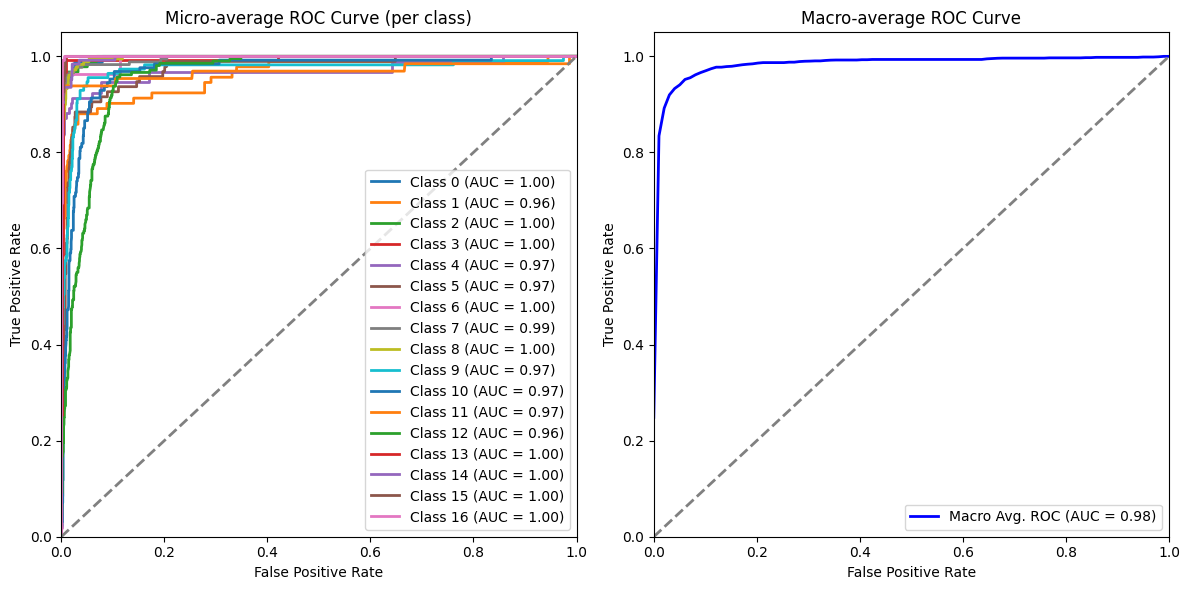

In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate micro-average ROC AUC score
roc_auc_micro = roc_auc_score(true_labels, bert_probs, average='micro')

# Calculate macro-average ROC curve
n_classes = true_labels.shape[1]

plt.figure(figsize=(12, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each class without interpolation
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Calculate macro-average ROC curve
mean_fpr = np.linspace(0, 1, 100)  # Common set of points
mean_tpr = np.zeros_like(mean_fpr)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

mean_tpr /= n_classes
roc_auc_macro = auc(mean_fpr, mean_tpr)

# Plot micro-average ROC curve
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve (per class)')
plt.legend(loc="lower right")

# Plot macro-average ROC curve
plt.subplot(1, 2, 2)
plt.plot(mean_fpr, mean_tpr, color='blue', linestyle='-', lw=2, label=f'Macro Avg. ROC (AUC = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC Curve')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


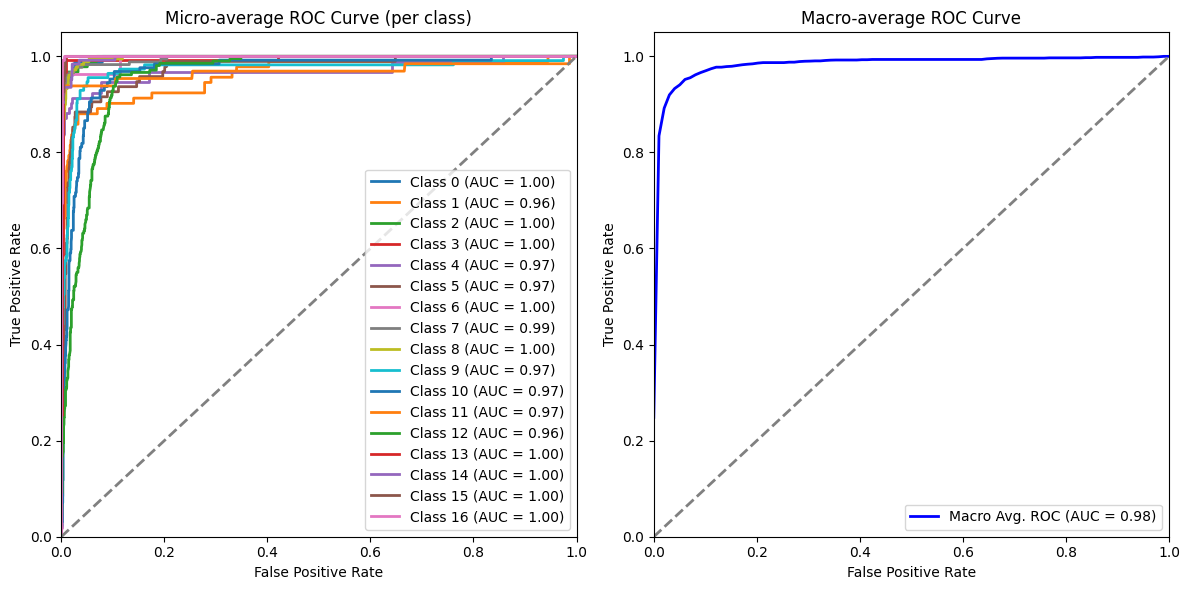

In [30]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate micro-average ROC AUC score
roc_auc_micro = roc_auc_score(true_labels, bert_probs, average='micro')

# Calculate macro-average ROC curve
n_classes = true_labels.shape[1]

plt.figure(figsize=(12, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each class without interpolation
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Calculate macro-average ROC curve
mean_fpr = np.linspace(0, 1, 100)  # Common set of points
mean_tpr = np.zeros_like(mean_fpr)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

mean_tpr /= n_classes
roc_auc_macro = auc(mean_fpr, mean_tpr)

# Plot micro-average ROC curve
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve (per class)')
plt.legend(loc="lower right")

# Plot macro-average ROC curve
plt.subplot(1, 2, 2)
plt.plot(mean_fpr, mean_tpr, color='blue', linestyle='-', lw=2, label=f'Macro Avg. ROC (AUC = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC Curve')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



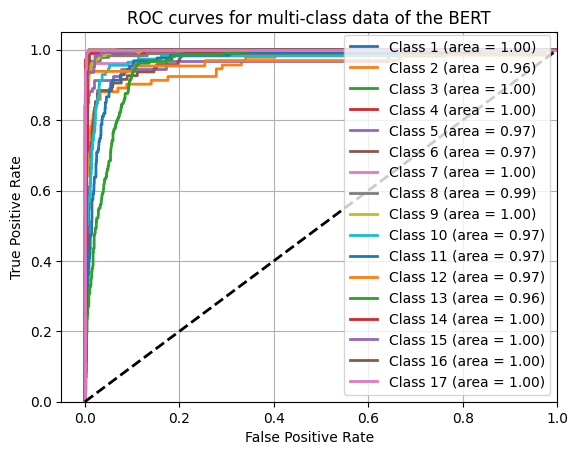

In [31]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the BERT')
plt.legend(loc="lower right")
plt.savefig('roc1.png', format='png', dpi=1200)
plt.grid(True)

plt.show()

# Compare F1

In [32]:
# Generate classification reports
report_predicted = classification_report(true_labels, predicted_labels, output_dict=True)
report_bert = classification_report(true_labels, bert_labels, output_dict=True)

/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ag

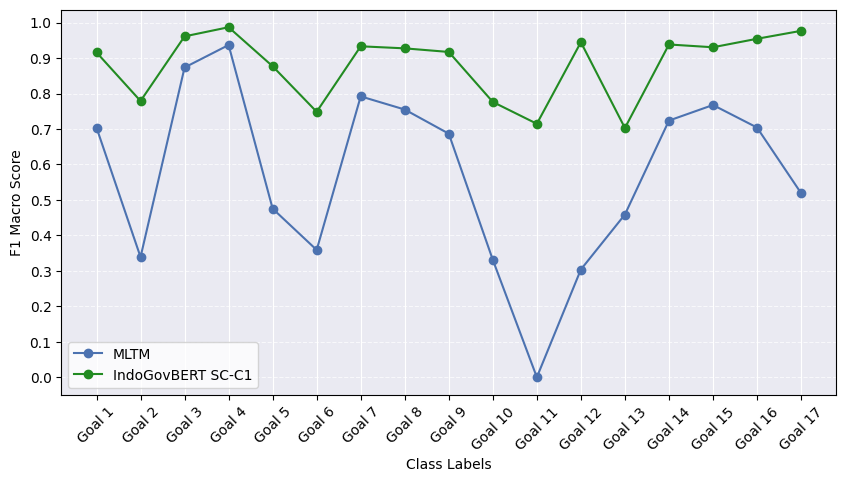

In [33]:
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_facecolor('#eaeaf2')

# Extract F1_macro scores for each class
classes = [str(i) for i in range(len(report_predicted.keys()) - 4)]  # Extract class labels
labels_classes = [f'Goal {i}' for i in range(1, len(report_predicted.keys()) - 3)]  # Update class labels
f1_macro_predicted = [report_predicted[label]["f1-score"] for label in classes]
f1_macro_bert = [report_bert[label]["f1-score"] for label in classes]

# Create a line plot
x = np.arange(len(classes))
plt.plot(x, f1_macro_predicted, marker='o', label='MLTM', linestyle='-', color='#4c72b0')
plt.plot(x, f1_macro_bert, marker='o', label='IndoGovBERT SC-C1', linestyle='-', color='forestgreen')

plt.xlabel('Class Labels')
plt.ylabel('F1 Macro Score')
#plt.title('Comparison of F1 Macro Scores by Class Label on Budget Data')
plt.xticks(x, labels_classes, rotation=45)  # Rotate labels by 45 degrees

# Customize the y-axis gridlines

y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.grid(True, color='white')

plt.show()

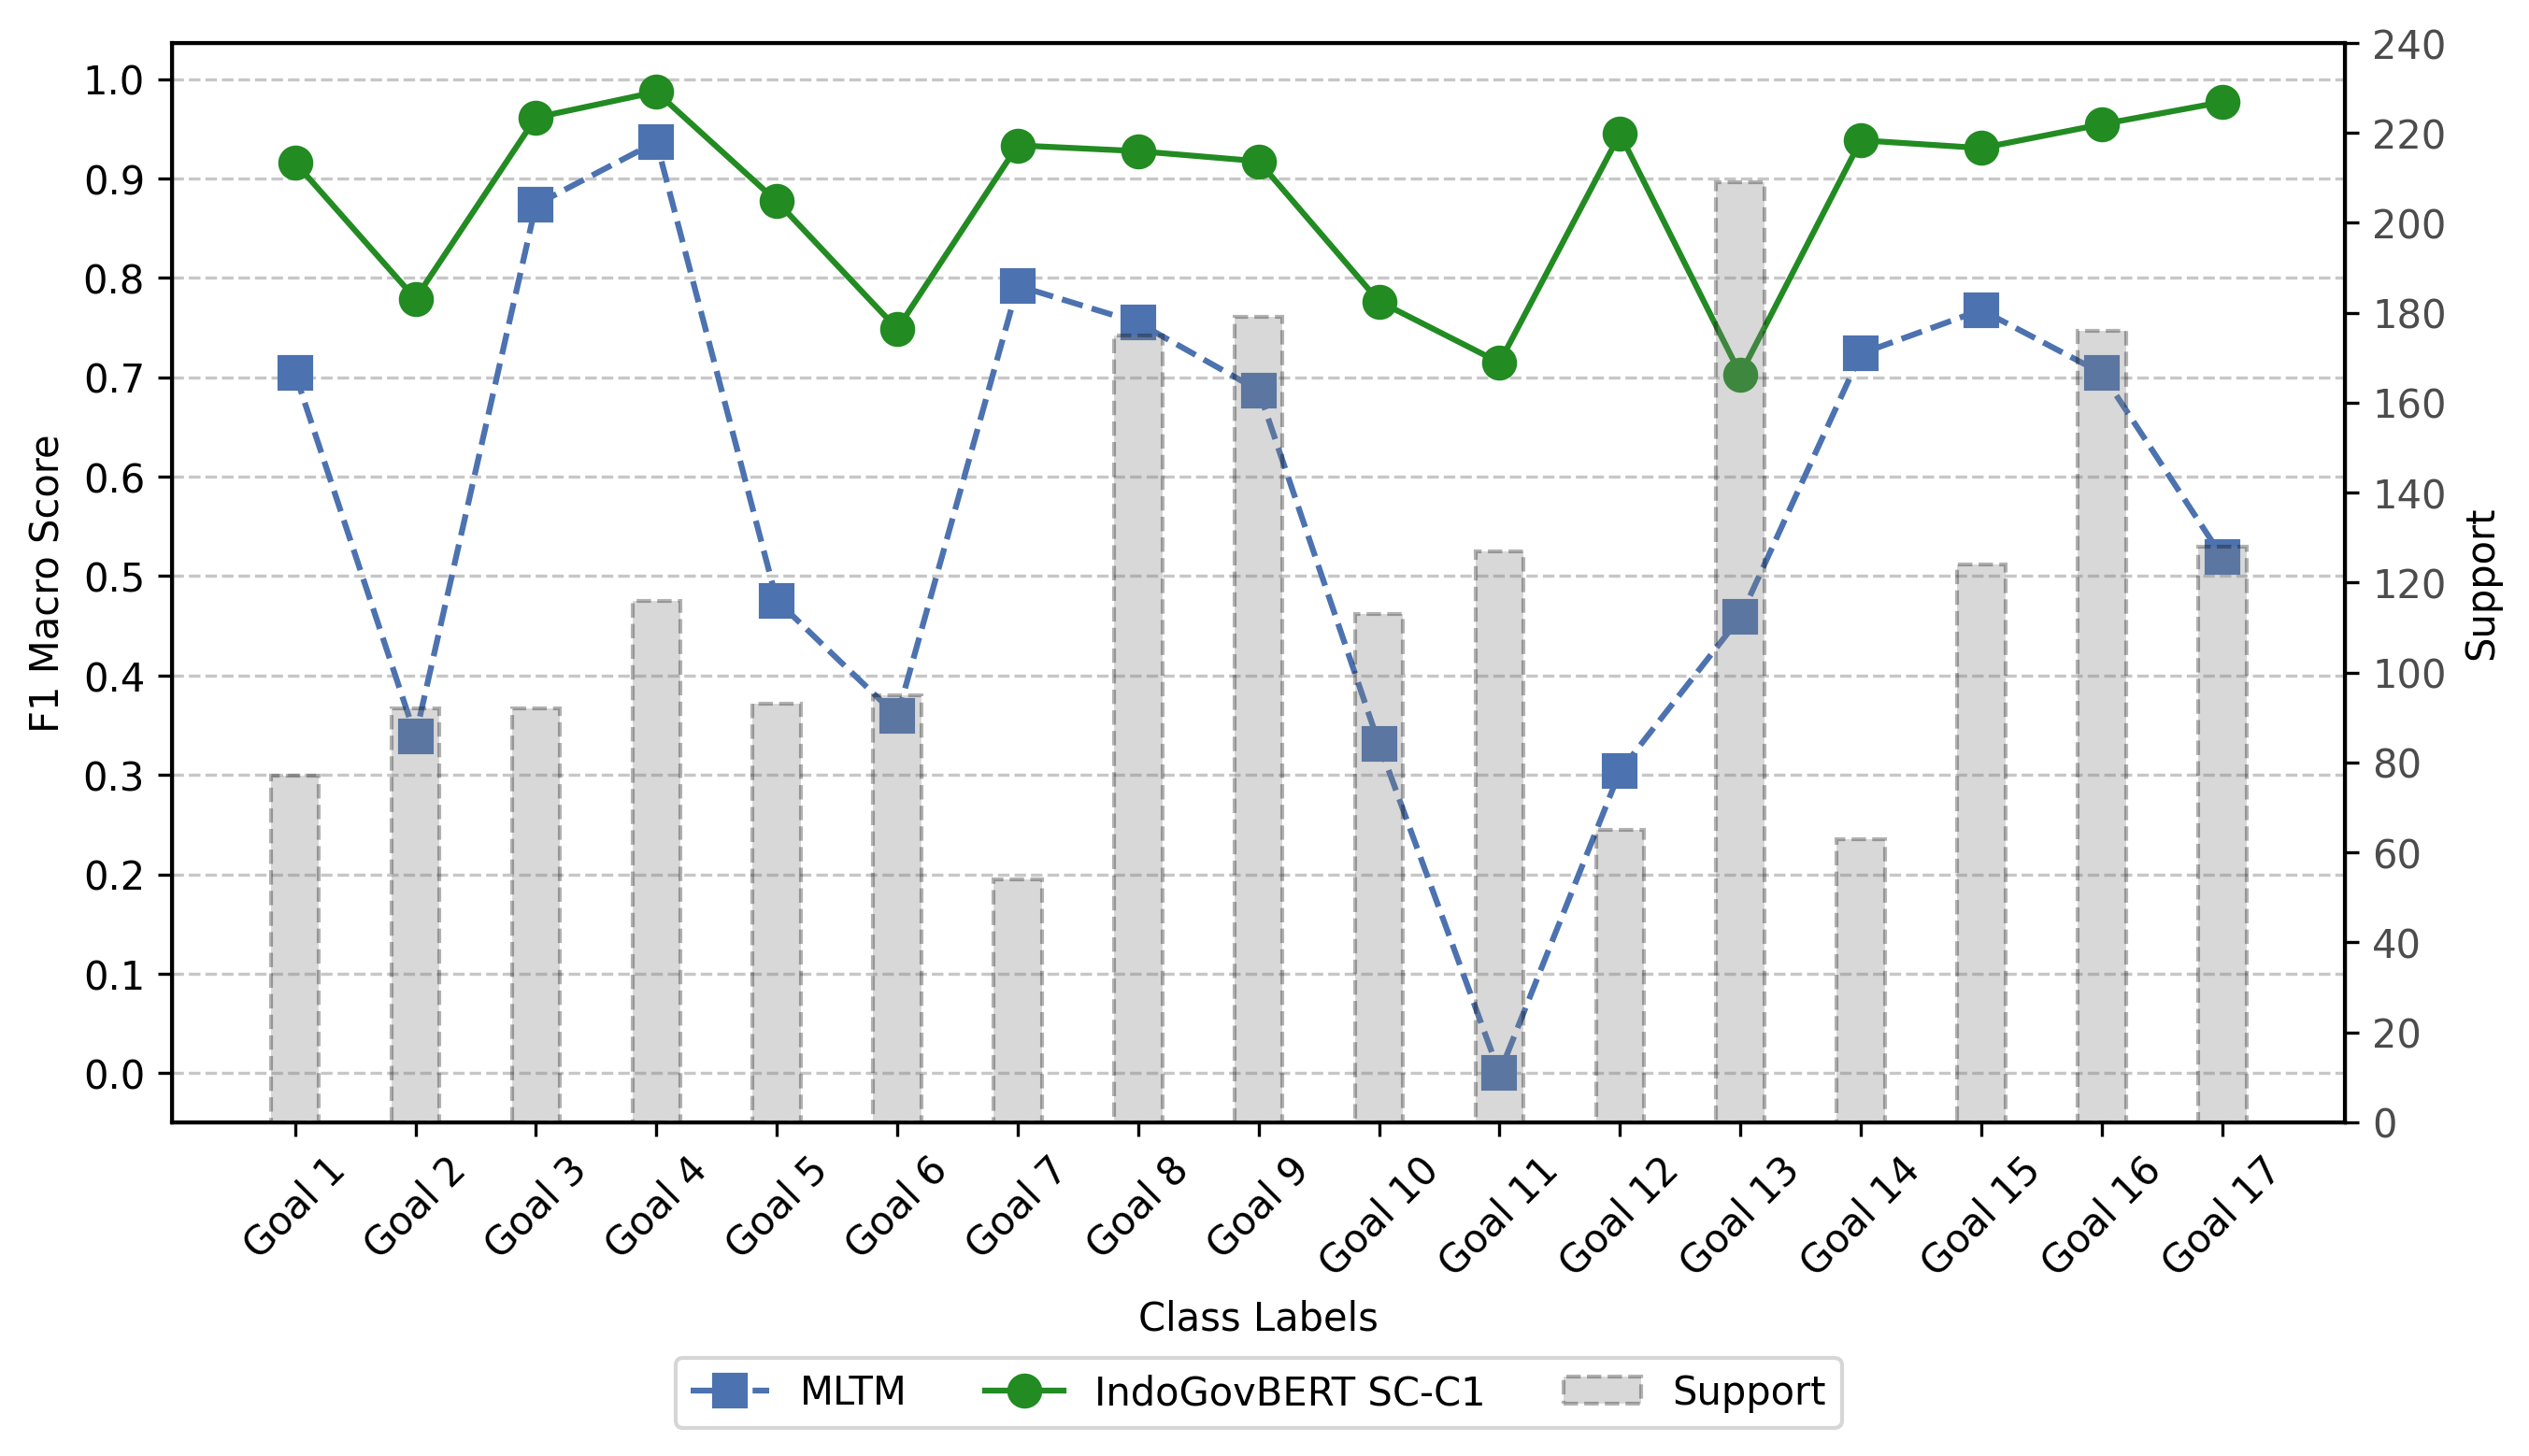

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5),dpi=300)

# Extract F1_macro scores and support values for each class
classes = [str(i) for i in range(len(report_predicted.keys()) - 4)]  # Extract class labels
labels_classes = [f'Goal {i}' for i in range(1, len(report_predicted.keys()) - 3)]  # Update class labels
f1_macro_predicted = [report_predicted[label]["f1-score"] for label in classes]
f1_macro_bert = [report_bert[label]["f1-score"] for label in classes]
support_data = [report_bert[label]["support"] for label in classes]

# Create a line plot for F1 Macro Scores on ax
x = np.arange(len(classes))
plt.plot(x, f1_macro_predicted, marker='s', label='MLTM', linestyle='--', color='#4c72b0', markersize=8)
plt.plot(x, f1_macro_bert, marker='o', label='IndoGovBERT SC-C1', linestyle='-', color='forestgreen', markersize=8)

plt.xlabel('Class Labels')
plt.ylabel('F1 Macro Score')
plt.xticks(x, labels_classes, rotation=45)  # Rotate labels by 45 degrees
plt.legend()

# Customize the y-axis gridlines on ax
y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Get the current axes (ax)
ax = plt.gca()
ax.set_facecolor('white')

# Set the linewidth for all spines to 1 on ax
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)

# Create a secondary y-axis (ax2) for support data
ax2 = ax.twinx()
ax2.bar(x, support_data, alpha=0.3, linestyle='--', color='gray', edgecolor='black', width=0.4, label='Support')

# Customize the y-axis gridlines on ax2
y_ticks_ax2 = np.arange(0, 250, 20)  # Adjust based on your support data range
ax2.set_yticks(y_ticks_ax2)

# Set the y-axis label for ax2
ax2.set_ylabel('Support')

# Set alpha for y-axis ticks on ax2
for label in ax2.get_yticklabels():
    label.set_alpha(0.7)

# Combine legend for both line and bar plots
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax.legend(lines + lines2, labels + labels2, loc='lower left')
ax.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, ncol=3, frameon=True)

plt.grid(False)

plt.show()


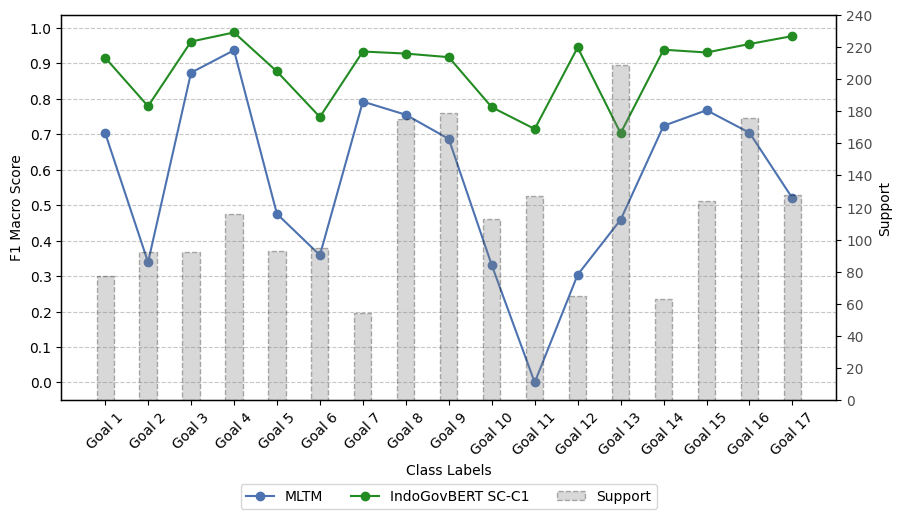

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

# Extract F1_macro scores and support values for each class
classes = [str(i) for i in range(len(report_predicted.keys()) - 4)]  # Extract class labels
labels_classes = [f'Goal {i}' for i in range(1, len(report_predicted.keys()) - 3)]  # Update class labels
f1_macro_predicted = [report_predicted[label]["f1-score"] for label in classes]
f1_macro_bert = [report_bert[label]["f1-score"] for label in classes]
support_data = [report_bert[label]["support"] for label in classes]

# Create a line plot for F1 Macro Scores on ax
x = np.arange(len(classes))
plt.plot(x, f1_macro_predicted, marker='o', label='MLTM', linestyle='-', color='#4c72b0')
plt.plot(x, f1_macro_bert, marker='o', label='IndoGovBERT SC-C1', linestyle='-', color='forestgreen')

plt.xlabel('Class Labels')
plt.ylabel('F1 Macro Score')
plt.xticks(x, labels_classes, rotation=45)  # Rotate labels by 45 degrees
plt.legend()

# Customize the y-axis gridlines on ax
y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Get the current axes (ax)
ax = plt.gca()
ax.set_facecolor('white')

# Set the linewidth for all spines to 1 on ax
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)

# Create a secondary y-axis (ax2) for support data
ax2 = ax.twinx()
ax2.bar(x, support_data, alpha=0.3, linestyle='--', color='gray', edgecolor='black', width=0.4, label='Support')

# Customize the y-axis gridlines on ax2
y_ticks_ax2 = np.arange(0, 250, 20)  # Adjust based on your support data range
ax2.set_yticks(y_ticks_ax2)

# Set the y-axis label for ax2
ax2.set_ylabel('Support')

# Set alpha for y-axis ticks on ax2
for label in ax2.get_yticklabels():
    label.set_alpha(0.7)

# Combine legend for both line and bar plots
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax.legend(lines + lines2, labels + labels2, loc='lower left')
ax.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, ncol=3, frameon=True)

plt.grid(False)

plt.show()


In [35]:
f1_macro_predicted

[0.7039999999999998,
 0.3389830508474576,
 0.8735632183908046,
 0.9369369369369369,
 0.4754098360655738,
 0.358974358974359,
 0.7920792079207921,
 0.7549668874172185,
 0.6868686868686867,
 0.3310344827586207,
 0.0,
 0.3037974683544304,
 0.4589041095890411,
 0.7238095238095238,
 0.7677725118483412,
 0.7042253521126761,
 0.5193370165745856]

In [36]:
f1_macro_bert

[0.9161290322580644,
 0.7790697674418605,
 0.9613259668508287,
 0.9871244635193134,
 0.877005347593583,
 0.7486631016042781,
 0.9333333333333333,
 0.9275362318840579,
 0.9173789173789174,
 0.7763713080168776,
 0.714828897338403,
 0.9448818897637796,
 0.7029478458049886,
 0.9384615384615386,
 0.9306122448979591,
 0.9545454545454546,
 0.9769230769230769]

# COmbine

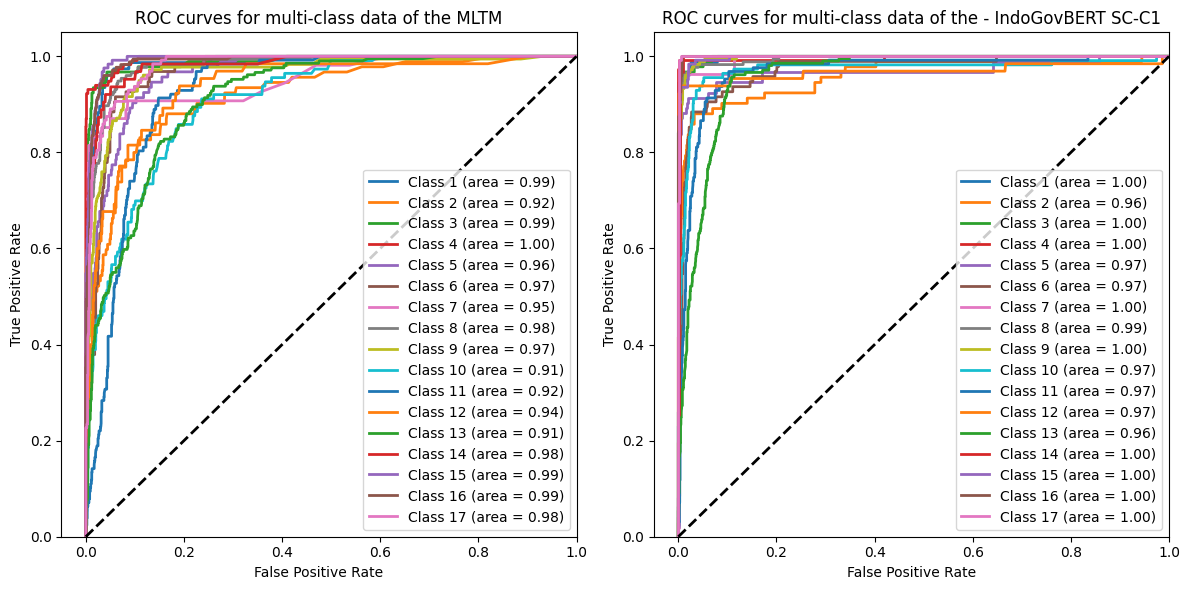

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have defined the variables for MLTM and BERT ROC data

# Create a new figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Plot ROC curves for MLTM
plt.subplot(1, 2, 1)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the MLTM')
plt.legend(loc="lower right")

# Plot ROC curves for BERT
plt.subplot(1, 2, 2)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the - IndoGovBERT SC-C1')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plots
plt.show()


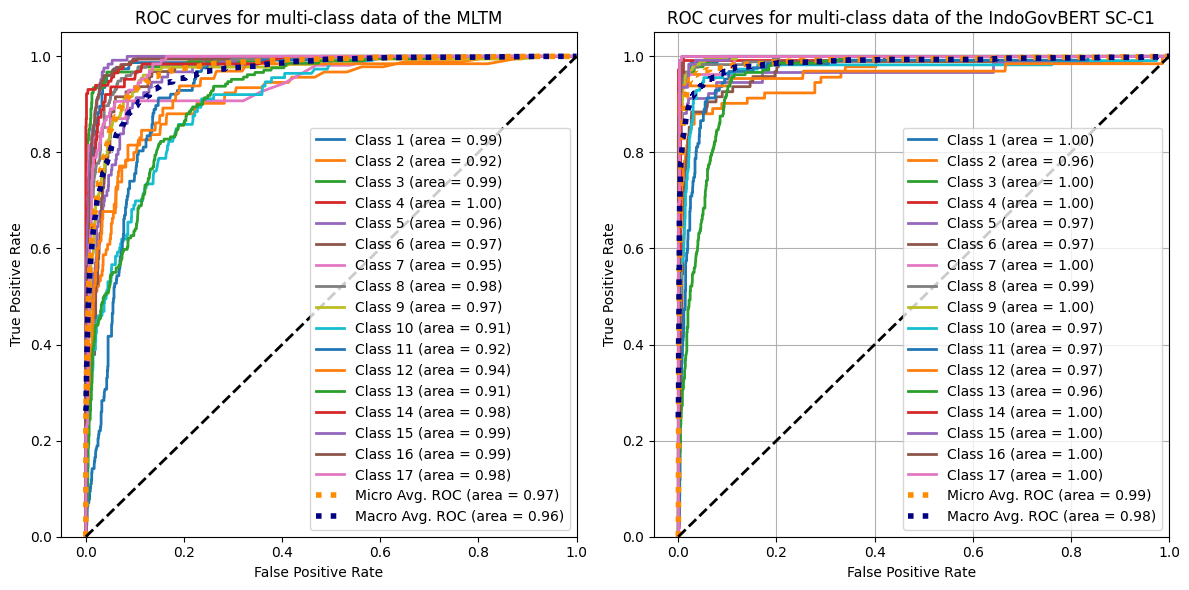

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have defined the variables for MLTM and BERT ROC data

# Create a new figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Plot ROC curves for MLTM
plt.subplot(1, 2, 1)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

# Calculate micro-average ROC and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', linestyle=':',
         linewidth=4, label='Micro Avg. ROC (area = {0:0.2f})'.format(roc_auc["micro"]))

# Calculate macro-average ROC and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, color='navy', linestyle=':',
         linewidth=4, label='Macro Avg. ROC (area = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the MLTM')
plt.legend(loc="lower right")

# Plot ROC curves for BERT
plt.subplot(1, 2, 2)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

# Calculate micro-average ROC and AUC for BERT
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), bert_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', linestyle=':',
         linewidth=4, label='Micro Avg. ROC (area = {0:0.2f})'.format(roc_auc["micro"]))

# Calculate macro-average ROC and AUC for BERT
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, color='navy', linestyle=':',
         linewidth=4, label='Macro Avg. ROC (area = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# Finish the plot settings for ROC curves for BERT
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the IndoGovBERT SC-C1')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()
plt.grid(True)

# Show the combined plots
plt.show()



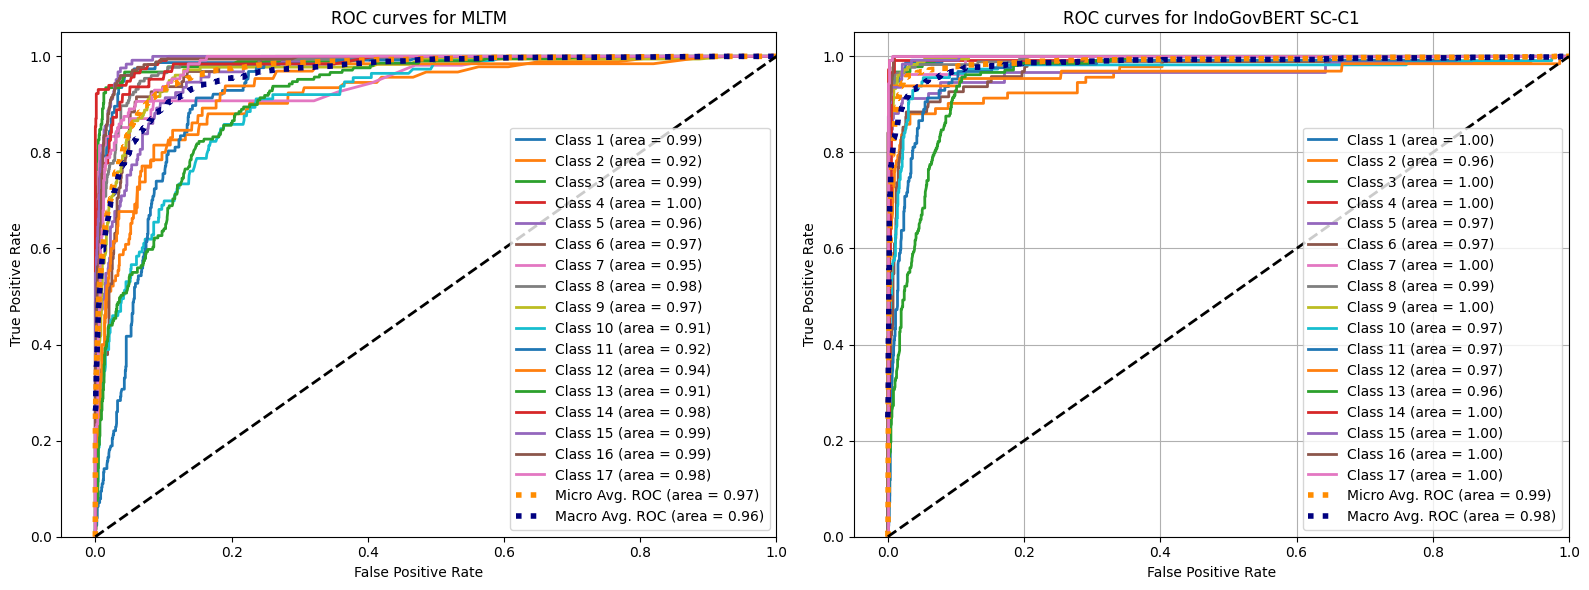

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have defined the variables for MLTM and BERT ROC data

# Create a new figure with two subplots side by side
plt.figure(figsize=(16, 6))

# Plot ROC curves for MLTM
plt.subplot(1, 2, 1)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])

colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

# Calculate micro-average ROC and AUC for MLTM
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', linestyle=':',
         linewidth=4, label='Micro Avg. ROC (area = {0:0.2f})'.format(roc_auc["micro"]))

# Calculate macro-average ROC and AUC for MLTM
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, color='navy', linestyle=':',
         linewidth=4, label='Macro Avg. ROC (area = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for MLTM')
plt.legend(loc="lower right")

# Plot ROC curves for BERT
plt.subplot(1, 2, 2)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])

colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

# Calculate micro-average ROC and AUC for BERT
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), bert_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', linestyle=':',
         linewidth=4, label='Micro Avg. ROC (area = {0:0.2f})'.format(roc_auc["micro"]))

# Calculate macro-average ROC and AUC for BERT
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, color='navy', linestyle=':',
         linewidth=4, label='Macro Avg. ROC (area = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# Finish the plot settings for ROC curves for BERT
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for IndoGovBERT SC-C1')
plt.legend(loc="lower right")

# Adjust
# Adjust spacing between subplots
plt.tight_layout()
plt.grid(True)


# Show the combined plots
plt.show()


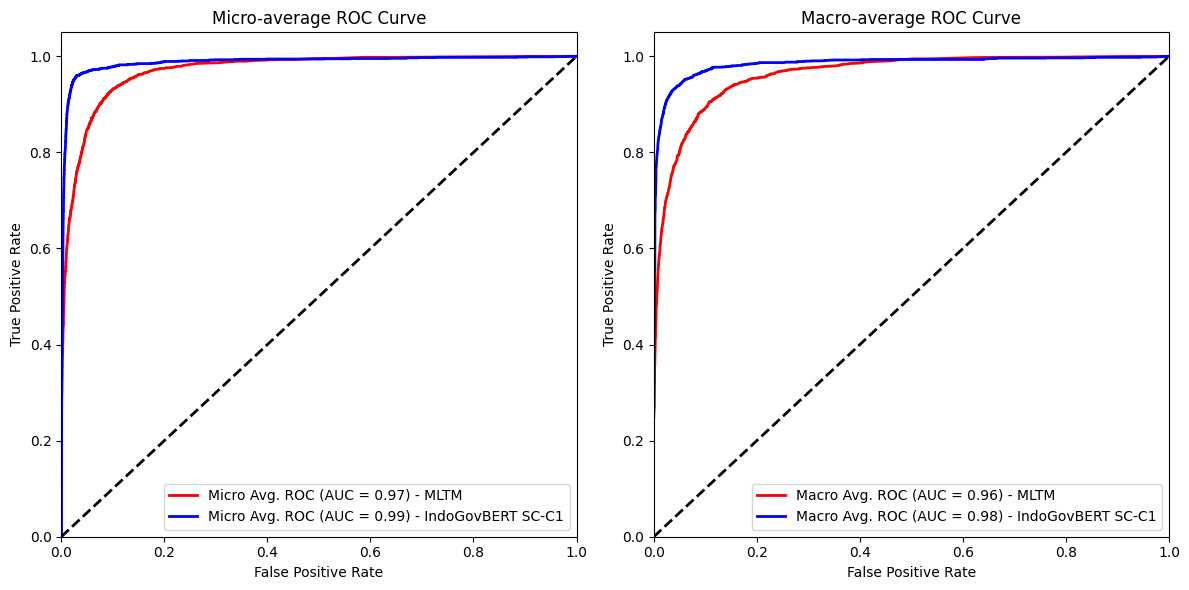

In [40]:
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Compute micro-average ROC curve and ROC area for MLTM
fpr_mltm_micro, tpr_mltm_micro, _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())
roc_auc_mltm_micro = auc(fpr_mltm_micro, tpr_mltm_micro)

# First aggregate all false positive rates for MLTM
all_fpr_mltm = np.unique(fpr_mltm_micro)

# Then interpolate the micro-average ROC curve for MLTM
mean_tpr_mltm_micro = np.interp(all_fpr_mltm, fpr_mltm_micro, tpr_mltm_micro)

# Plot micro-average ROC curve for MLTM
plt.subplot(1, 2, 1)
plt.plot(
    fpr_mltm_micro,
    tpr_mltm_micro,
    label="Micro Avg. ROC (AUC = {0:.2f}) - MLTM".format(roc_auc_mltm_micro),
    color="red",
    linestyle="-",
    linewidth=2,
)

# Compute micro-average ROC curve and ROC area for BERT
fpr_bert_micro, tpr_bert_micro, _ = roc_curve(true_labels.ravel(), bert_probs.ravel())
roc_auc_bert_micro = auc(fpr_bert_micro, tpr_bert_micro)

# Then interpolate the micro-average ROC curve for BERT
mean_tpr_bert_micro = np.interp(all_fpr_mltm, fpr_bert_micro, tpr_bert_micro)

# Plot micro-average ROC curve for BERT
plt.plot(
    fpr_bert_micro,
    tpr_bert_micro,
    label="Micro Avg. ROC (AUC = {0:.2f}) - IndoGovBERT SC-C1".format(roc_auc_bert_micro),
    color="blue",
    linestyle="-",
    linewidth=2,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend(loc="lower right")

# Compute macro-average ROC curve for MLTM
n_classes_mltm = true_labels.shape[1]
all_fpr_mltm_macro = []
all_tpr_mltm_macro = []
for i in range(n_classes_mltm):
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    all_fpr_mltm_macro.append(fpr)
    all_tpr_mltm_macro.append(tpr)

# Interpolate all ROC curves to create a common set of points for macro-average calculation for MLTM
mean_fpr_mltm_macro = np.unique(np.concatenate(all_fpr_mltm_macro))
mean_tpr_mltm_macro = np.zeros_like(mean_fpr_mltm_macro)
for i in range(n_classes_mltm):
    mean_tpr_mltm_macro += np.interp(mean_fpr_mltm_macro, all_fpr_mltm_macro[i], all_tpr_mltm_macro[i])

mean_tpr_mltm_macro /= n_classes_mltm

# Calculate macro-average ROC AUC score for MLTM
roc_auc_mltm_macro = auc(mean_fpr_mltm_macro, mean_tpr_mltm_macro)

# Compute macro-average ROC curve for BERT
n_classes_bert = true_labels.shape[1]
all_fpr_bert_macro = []
all_tpr_bert_macro = []
for i in range(n_classes_bert):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    all_fpr_bert_macro.append(fpr)
    all_tpr_bert_macro.append(tpr)

# Interpolate all ROC curves to create a common set of points for macro-average calculation for BERT
mean_fpr_bert_macro = np.unique(np.concatenate(all_fpr_bert_macro))
mean_tpr_bert_macro = np.zeros_like(mean_fpr_bert_macro)
for i in range(n_classes_bert):
    mean_tpr_bert_macro += np.interp(mean_fpr_bert_macro, all_fpr_bert_macro[i], all_tpr_bert_macro[i])

mean_tpr_bert_macro /= n_classes_bert

# Calculate macro-average ROC AUC score for BERT
roc_auc_bert_macro = auc(mean_fpr_bert_macro, mean_tpr_bert_macro)

# Plot macro-average ROC curve for MLTM
plt.subplot(1, 2, 2)
# Plot macro-average ROC curve for MLTM
plt.plot(
    mean_fpr_mltm_macro,
    mean_tpr_mltm_macro,
    label="Macro Avg. ROC (AUC = {0:.2f}) - MLTM".format(roc_auc_mltm_macro),
    color="red",
    linestyle="-",
    linewidth=2,
)

# Plot macro-average ROC curve for BERT
plt.plot(
    mean_fpr_bert_macro,
    mean_tpr_bert_macro,
    label="Macro Avg. ROC (AUC = {0:.2f}) - IndoGovBERT SC-C1".format(roc_auc_bert_macro),
    color="blue",
    linestyle="-",
    linewidth=2,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC Curve')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


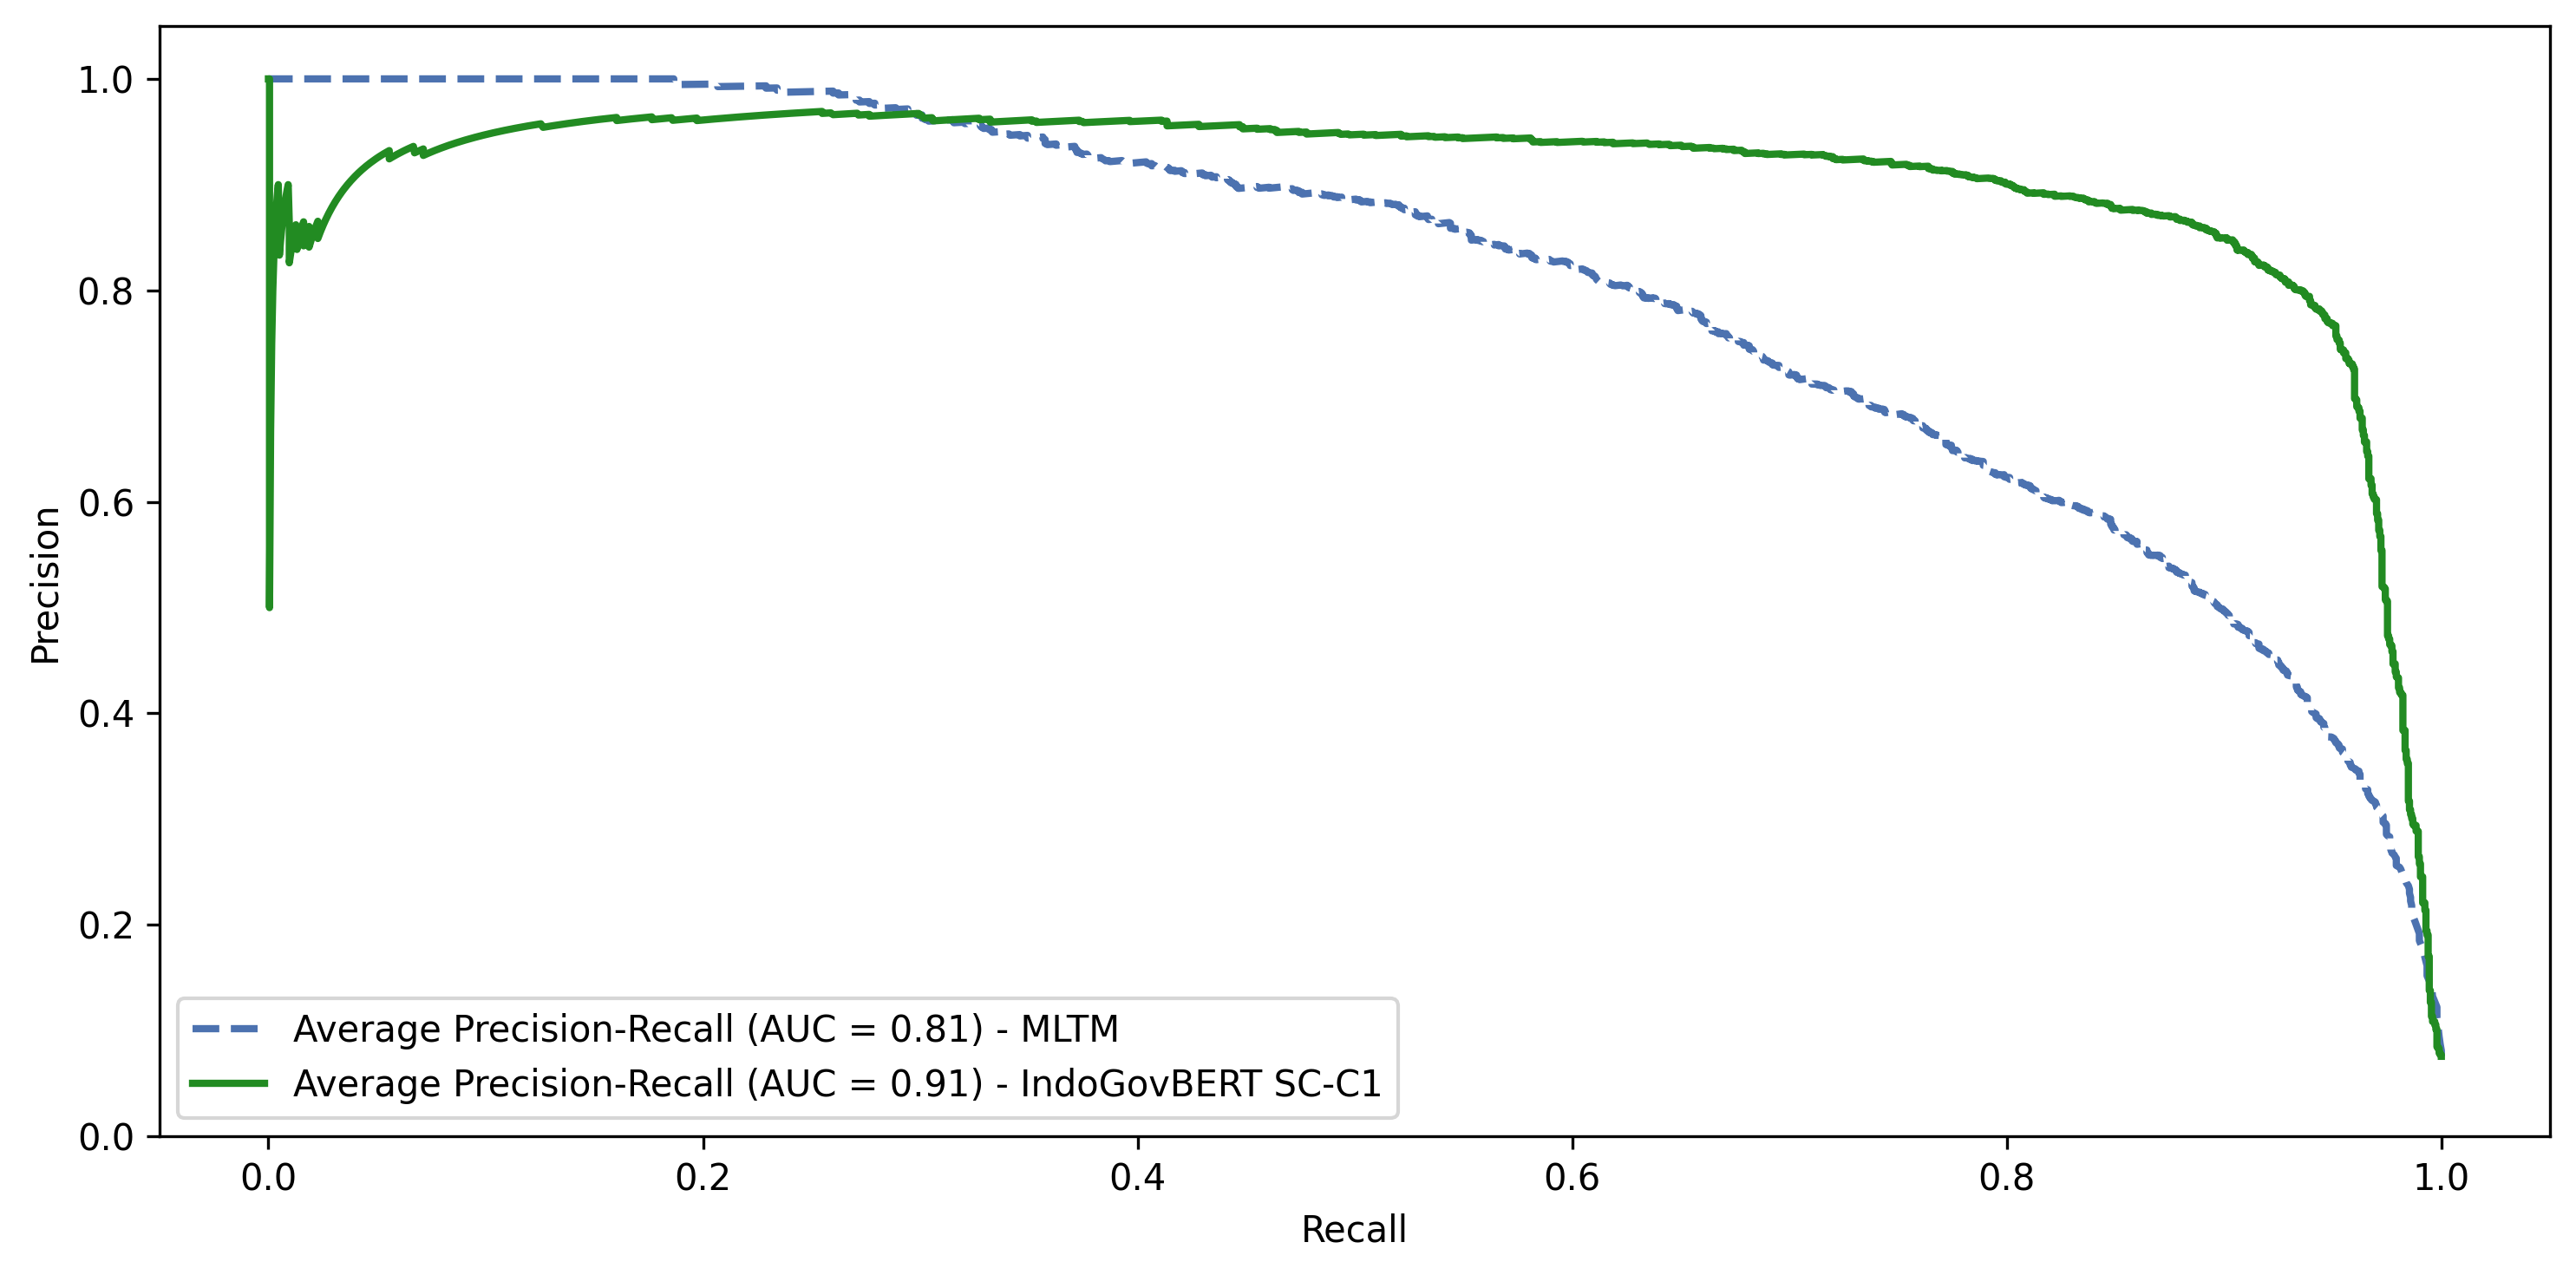

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have defined the variables for MLTM and BERT Precision-Recall data

# Calculate micro-average Precision-Recall and AUC for MLTM
precision_mltm_micro, recall_mltm_micro, _ = precision_recall_curve(true_labels.ravel(), predicted_probs.ravel())
pr_auc_mltm_micro = average_precision_score(true_labels, predicted_probs, average='micro')

precision_bert_micro, recall_bert_micro, _ = precision_recall_curve(true_labels.ravel(), bert_probs.ravel())
pr_auc_bert_micro = average_precision_score(true_labels, bert_probs, average='micro')


# Plot micro-average Precision-Recall curve for MLTM
plt.figure(figsize=(10, 5),dpi=300)
ax = plt.gca()
ax.set_facecolor('white')

plt.plot(
    recall_mltm_micro,
    precision_mltm_micro,
    label="Average Precision-Recall (AUC = {0:.2f}) - MLTM".format(pr_auc_mltm_micro),
    color="#4c72b0",
    linestyle="--",
    linewidth=2,
)

plt.plot(
    recall_bert_micro,
    precision_bert_micro,
    label="Average Precision-Recall (AUC = {0:.2f}) - IndoGovBERT SC-C1".format(pr_auc_bert_micro),
    color="forestgreen",
    linestyle="-",
    linewidth=2,
)



plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")

# Adjust spacing between subplots
plt.tight_layout()

plt.grid(True, color='white')

# Show the plot
plt.show()


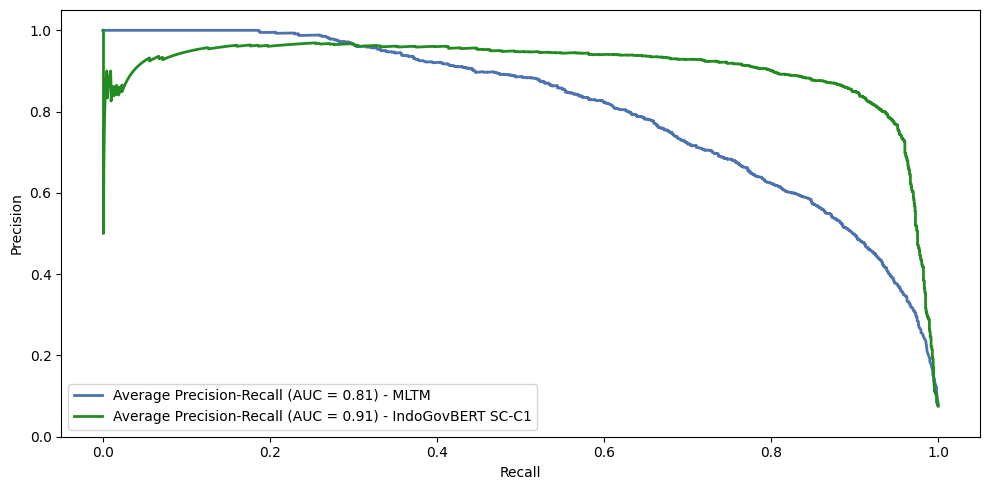

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have defined the variables for MLTM and BERT Precision-Recall data

# Calculate micro-average Precision-Recall and AUC for MLTM
precision_mltm_micro, recall_mltm_micro, _ = precision_recall_curve(true_labels.ravel(), predicted_probs.ravel())
pr_auc_mltm_micro = average_precision_score(true_labels, predicted_probs, average='micro')

precision_bert_micro, recall_bert_micro, _ = precision_recall_curve(true_labels.ravel(), bert_probs.ravel())
pr_auc_bert_micro = average_precision_score(true_labels, bert_probs, average='micro')


# Plot micro-average Precision-Recall curve for MLTM
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_facecolor('white')

plt.plot(
    recall_mltm_micro,
    precision_mltm_micro,
    label="Average Precision-Recall (AUC = {0:.2f}) - MLTM".format(pr_auc_mltm_micro),
    color="#4c72b0",
    linestyle="-",
    linewidth=2,
)

plt.plot(
    recall_bert_micro,
    precision_bert_micro,
    label="Average Precision-Recall (AUC = {0:.2f}) - IndoGovBERT SC-C1".format(pr_auc_bert_micro),
    color="forestgreen",
    linestyle="-",
    linewidth=2,
)


plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")

# Adjust spacing between subplots
plt.tight_layout()

plt.grid(True, color='white')

# Show the plot
plt.show()


# Treshold

Micro Avg. AUC: 0.97


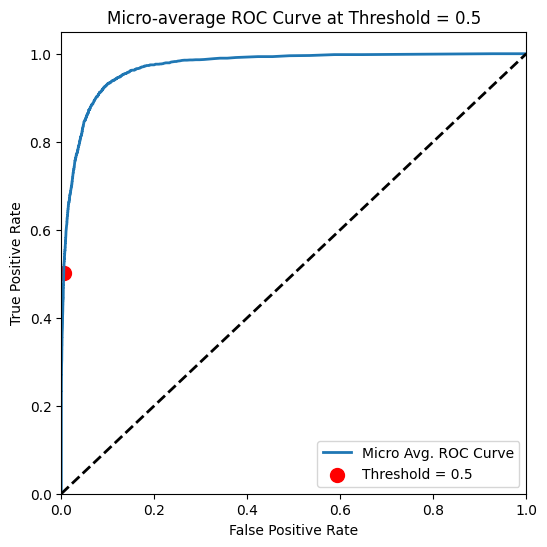

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Compute micro-average ROC curve and ROC area for MLTM
fpr_mltm_micro, tpr_mltm_micro, _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())

# Set the threshold value
threshold = 0.5

# Find the index where the TPR is greater than or equal to the threshold
idx = np.argmax(tpr_mltm_micro >= threshold)

# Extract the FPR and TPR values for the selected threshold
selected_fpr = fpr_mltm_micro[idx]
selected_tpr = tpr_mltm_micro[idx]

# Plot ROC curve for the selected threshold
plt.figure(figsize=(6, 6))
plt.plot(
    fpr_mltm_micro,
    tpr_mltm_micro,
    label="Micro Avg. ROC Curve",
    linewidth=2,
)

plt.scatter(
    selected_fpr,
    selected_tpr,
    c='red',
    marker='o',
    label=f"Threshold = {threshold}",
    s=100,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Micro-average ROC Curve at Threshold = {threshold}")
plt.legend(loc="lower right")

# Calculate ROC AUC for the entire ROC curve
roc_auc = auc(fpr_mltm_micro, tpr_mltm_micro)
print(f"Micro Avg. AUC: {roc_auc:.2f}")

# Show the plot
plt.show()


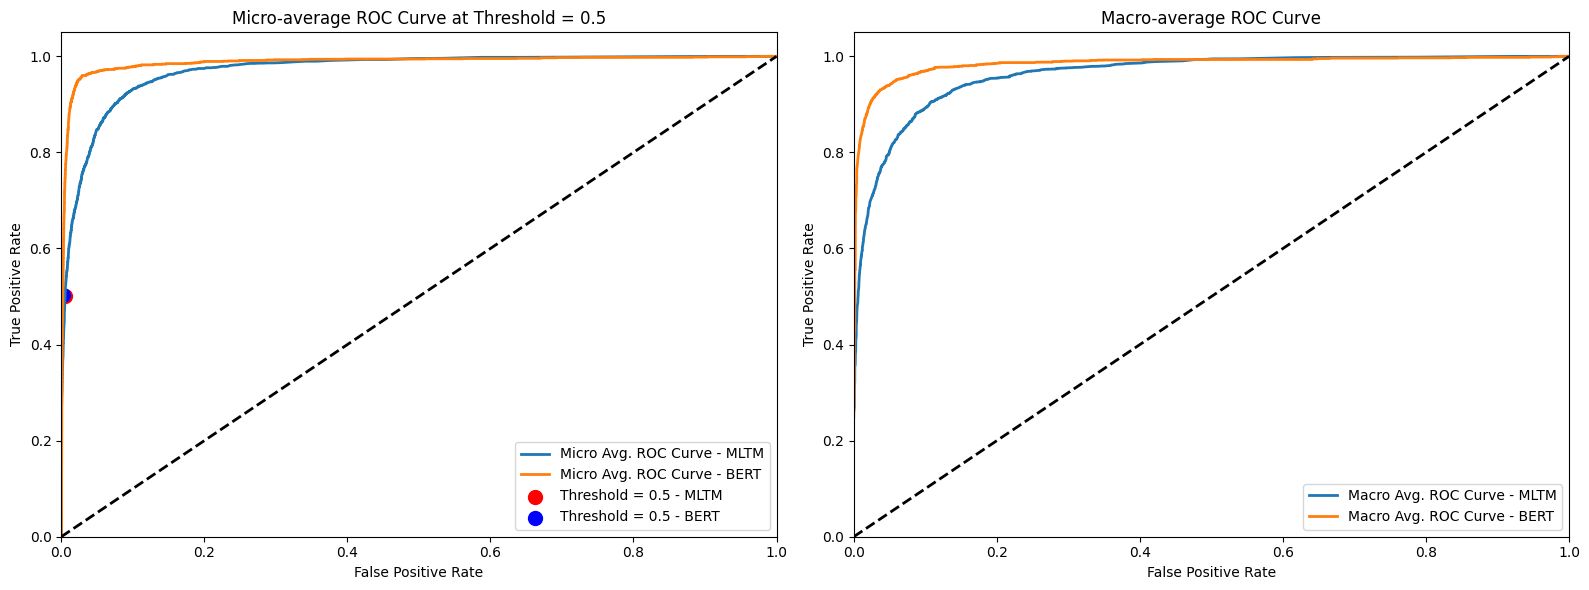

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Compute micro-average ROC curve and ROC area for MLTM
fpr_mltm_micro, tpr_mltm_micro, _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())

# Set the threshold value for micro-average
threshold_micro = 0.5

# Find the index where the TPR is greater than or equal to the threshold for micro-average - MLTM
idx_micro_mltm = np.argmax(tpr_mltm_micro >= threshold_micro)

# Extract the FPR and TPR values for the selected threshold for micro-average - MLTM
selected_fpr_micro_mltm = fpr_mltm_micro[idx_micro_mltm]
selected_tpr_micro_mltm = tpr_mltm_micro[idx_micro_mltm]

# Compute micro-average ROC curve and ROC area for BERT
fpr_bert_micro, tpr_bert_micro, _ = roc_curve(true_labels.ravel(), bert_probs.ravel())

# Find the index where the TPR is greater than or equal to the threshold for micro-average - BERT
idx_micro_bert = np.argmax(tpr_bert_micro >= threshold_micro)

# Extract the FPR and TPR values for the selected threshold for micro-average - BERT
selected_fpr_micro_bert = fpr_bert_micro[idx_micro_bert]
selected_tpr_micro_bert = tpr_bert_micro[idx_micro_bert]

# Compute macro-average ROC curve and ROC area for MLTM
n_classes_mltm = true_labels.shape[1]
all_fpr_mltm_macro = []
all_tpr_mltm_macro = []

for i in range(n_classes_mltm):
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    all_fpr_mltm_macro.append(fpr)
    all_tpr_mltm_macro.append(tpr)

# Interpolate all ROC curves to create a common set of points for macro-average calculation for MLTM
mean_fpr_mltm_macro = np.unique(np.concatenate(all_fpr_mltm_macro))
mean_tpr_mltm_macro = np.zeros_like(mean_fpr_mltm_macro)

for i in range(n_classes_mltm):
    mean_tpr_mltm_macro += np.interp(mean_fpr_mltm_macro, all_fpr_mltm_macro[i], all_tpr_mltm_macro[i])

mean_tpr_mltm_macro /= n_classes_mltm

# Calculate macro-average ROC AUC score for MLTM
roc_auc_mltm_macro = auc(mean_fpr_mltm_macro, mean_tpr_mltm_macro)

# Compute macro-average ROC curve and ROC area for BERT
n_classes_bert = true_labels.shape[1]
all_fpr_bert_macro = []
all_tpr_bert_macro = []

for i in range(n_classes_bert):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    all_fpr_bert_macro.append(fpr)
    all_tpr_bert_macro.append(tpr)

# Interpolate all ROC curves to create a common set of points for macro-average calculation for BERT
mean_fpr_bert_macro = np.unique(np.concatenate(all_fpr_bert_macro))
mean_tpr_bert_macro = np.zeros_like(mean_fpr_bert_macro)

for i in range(n_classes_bert):
    mean_tpr_bert_macro += np.interp(mean_fpr_bert_macro, all_fpr_bert_macro[i], all_tpr_bert_macro[i])

mean_tpr_bert_macro /= n_classes_bert

# Calculate macro-average ROC AUC score for BERT
roc_auc_bert_macro = auc(mean_fpr_bert_macro, mean_tpr_bert_macro)

# Create a figure with two subplots side by side
plt.figure(figsize=(16, 6))

# Plot micro-average ROC curve for MLTM and BERT on the left side
plt.subplot(1, 2, 1)
plt.plot(
    fpr_mltm_micro,
    tpr_mltm_micro,
    label="Micro Avg. ROC Curve - MLTM",
    linewidth=2,
)

plt.plot(
    fpr_bert_micro,
    tpr_bert_micro,
    label="Micro Avg. ROC Curve - BERT",
    linewidth=2,
)

plt.scatter(
    selected_fpr_micro_mltm,
    selected_tpr_micro_mltm,
    c='red',
    marker='o',
    label=f"Threshold = {threshold_micro} - MLTM",
    s=100,
)

plt.scatter(
    selected_fpr_micro_bert,
    selected_tpr_micro_bert,
    c='blue',
    marker='o',
    label=f"Threshold = {threshold_micro} - BERT",
    s=100,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Micro-average ROC Curve at Threshold = {threshold_micro}")
plt.legend(loc="lower right")

# Plot macro-average ROC curve for MLTM and BERT on the right side
plt.subplot(1, 2, 2)
plt.plot(
    mean_fpr_mltm_macro,
    mean_tpr_mltm_macro,
    label="Macro Avg. ROC Curve - MLTM",
    linewidth=2,
)

plt.plot(
    mean_fpr_bert_macro,
    mean_tpr_bert_macro,
    label="Macro Avg. ROC Curve - BERT",
    linewidth=2,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC Curve")
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute micro-average ROC curve and ROC area for MLTM
fpr_mltm_micro, tpr_mltm_micro, _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())
roc_auc_mltm_micro = auc(fpr_mltm_micro, tpr_mltm_micro)

# Find the index of the threshold closest to 0.5
idx = np.argmax(tpr_mltm_micro >= 0.5)

# Extract the FPR and TPR values for the selected threshold
selected_fpr = fpr_mltm_micro[idx]
selected_tpr = tpr_mltm_micro[idx]

roc_auc = auc([selected_fpr], [selected_tpr])

# Plot ROC curve for the selected threshold
plt.figure(figsize=(6, 6))
plt.plot(
    selected_fpr,
    selected_tpr,
    label=f"Threshold = 0.5 (AUC = {roc_auc:.2f})",
    linewidth=2,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-average ROC Curve at Threshold = 0.5")
plt.legend(loc="lower right")

# Show the plot
plt.show()




ValueError: At least 2 points are needed to compute area under curve, but x.shape = 1

# Testing

https://sites.google.com/site/nttrungmtwiki/home/it/data-science---python/multiclass-and-multilabel-roc-curve-plotting

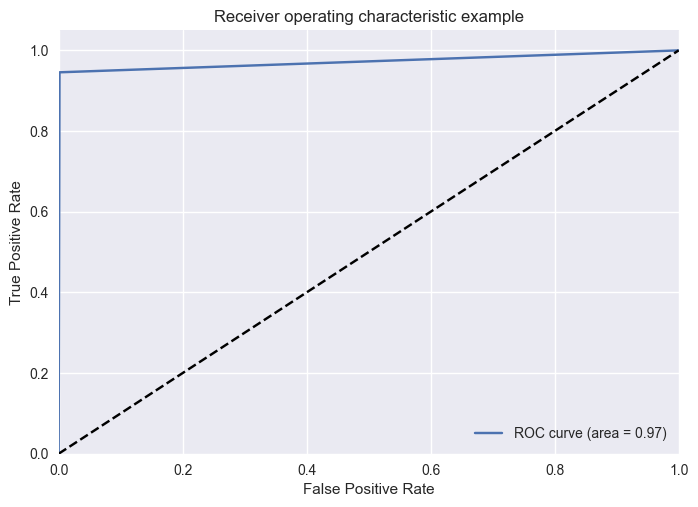

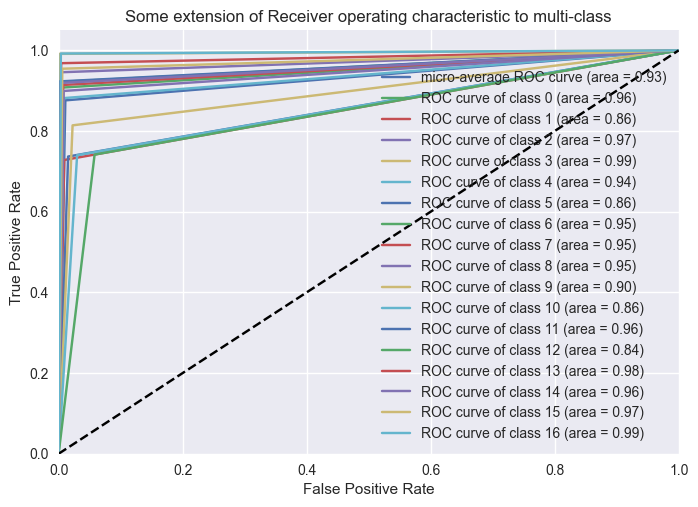

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), bert_labels.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Using Probabilities

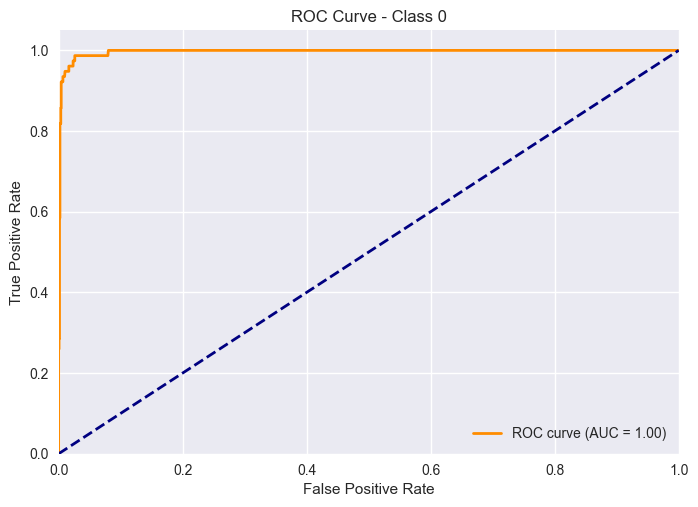

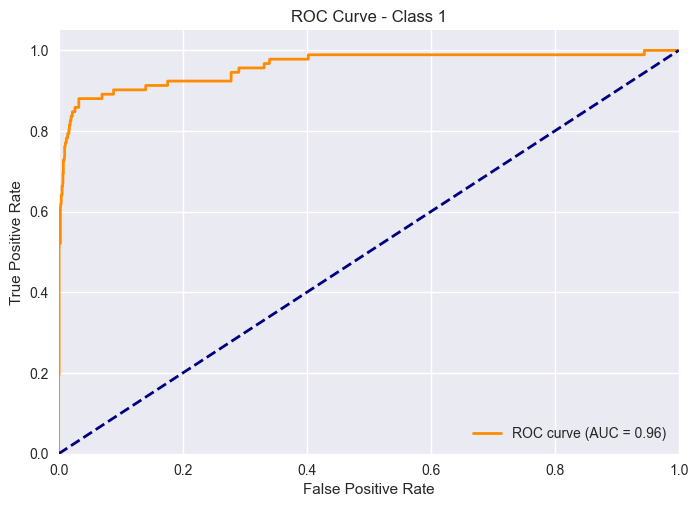

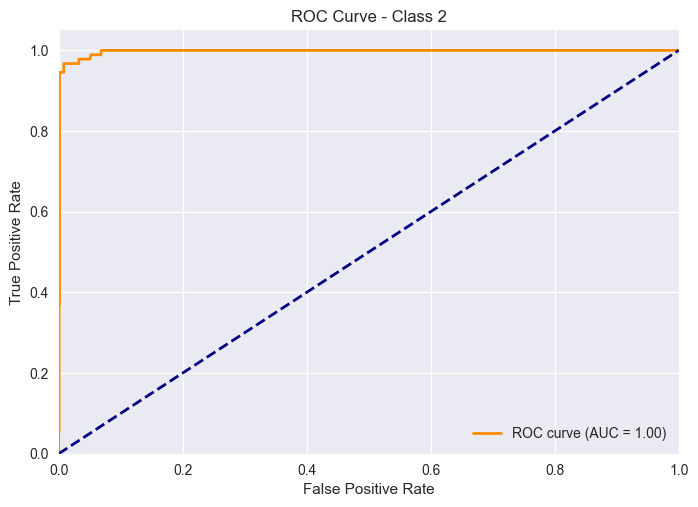

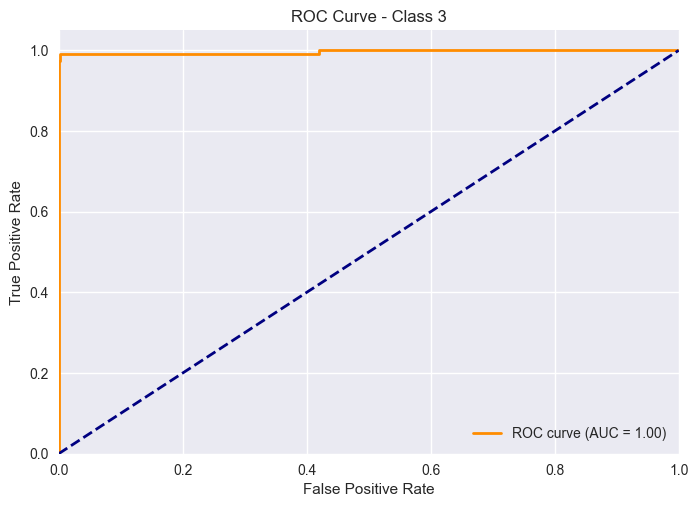

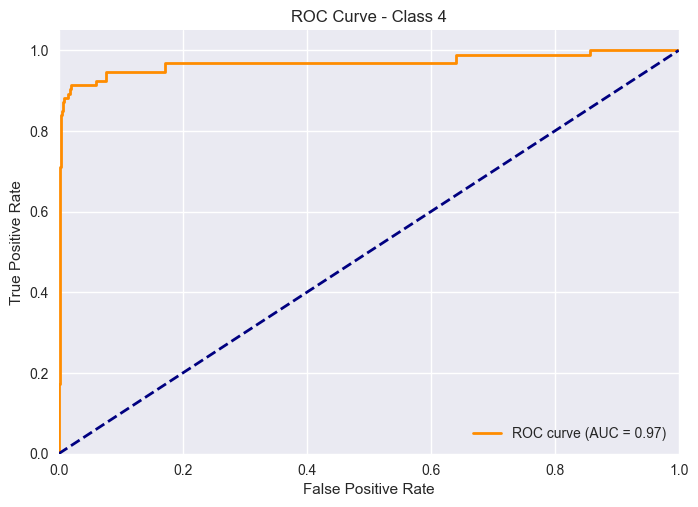

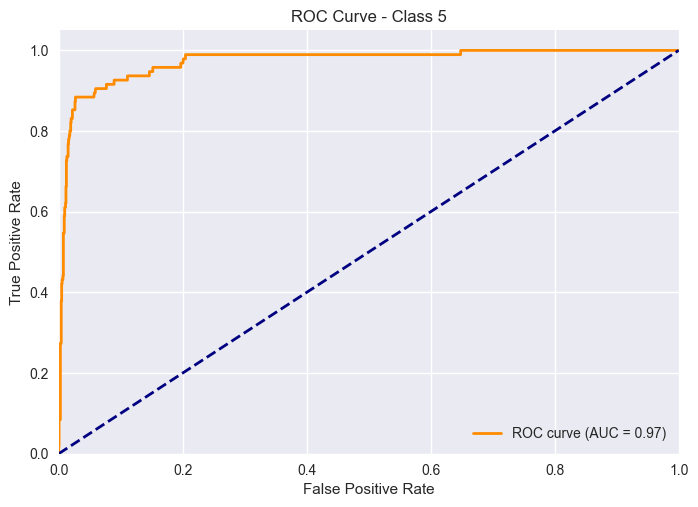

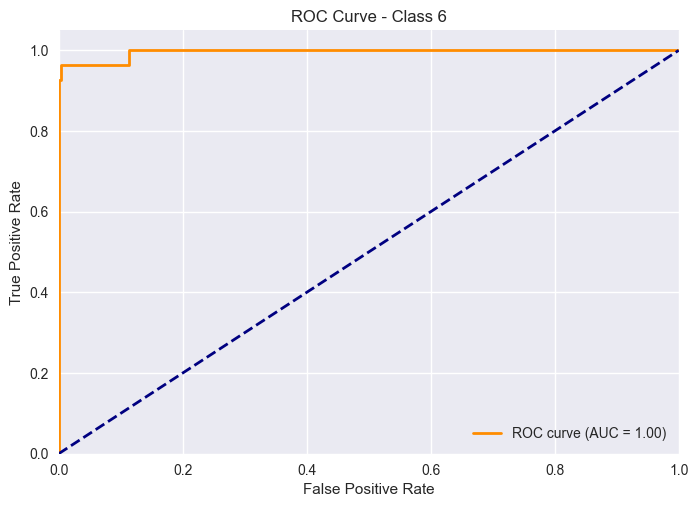

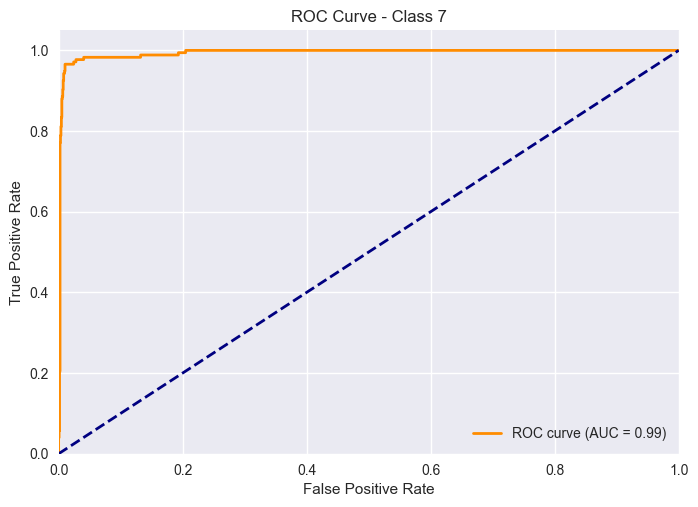

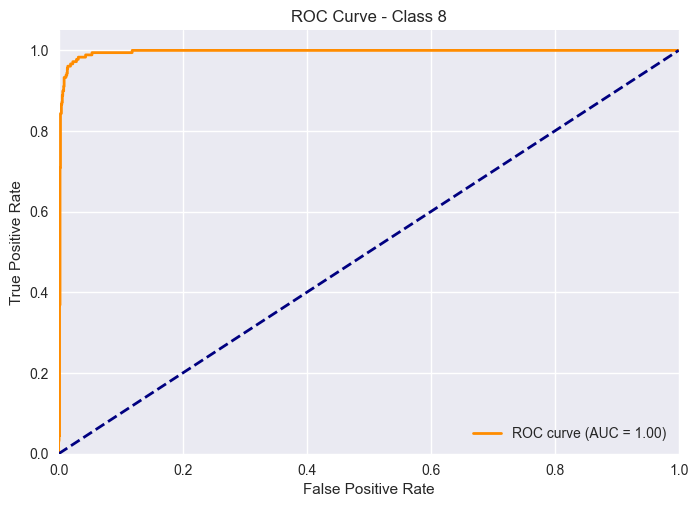

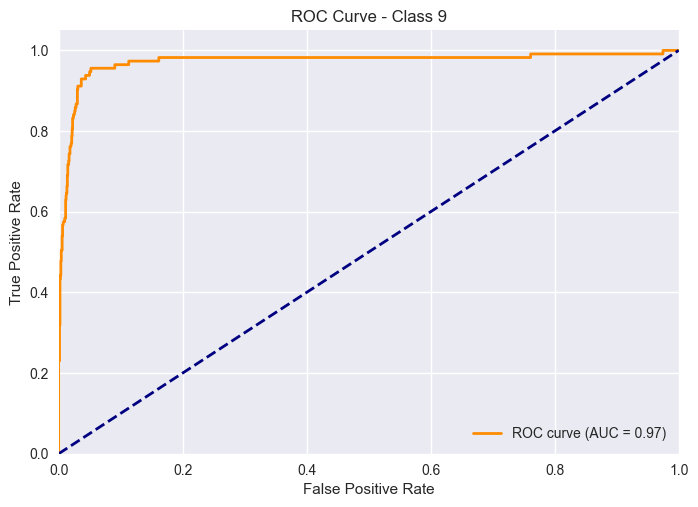

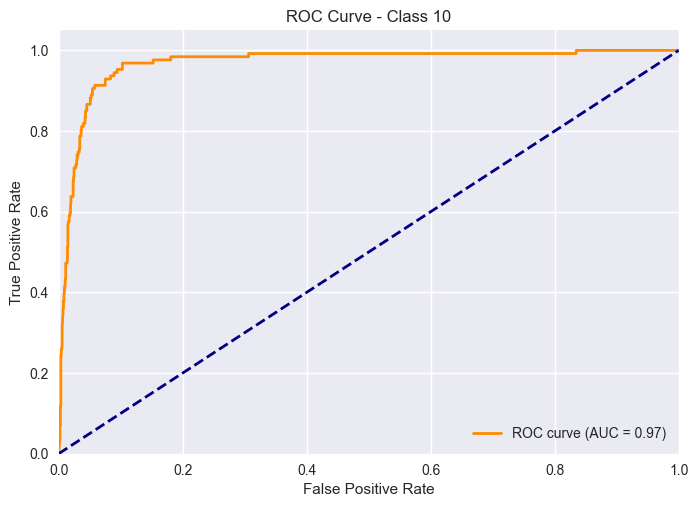

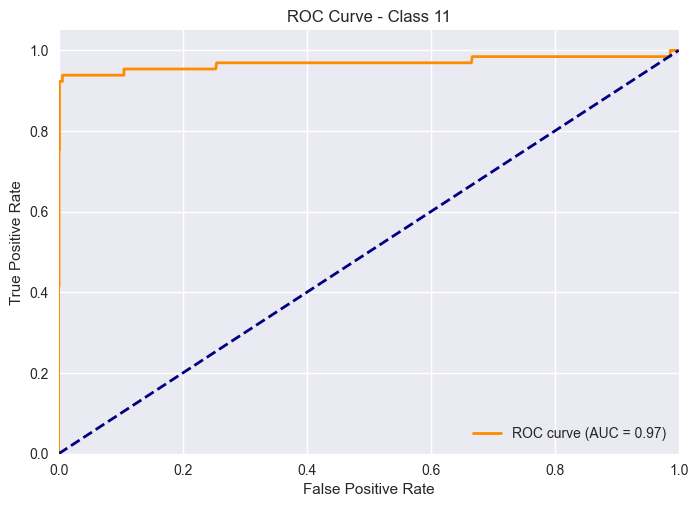

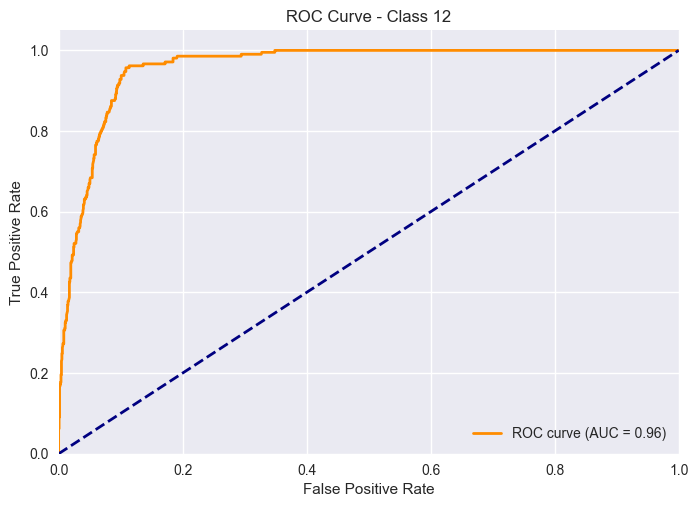

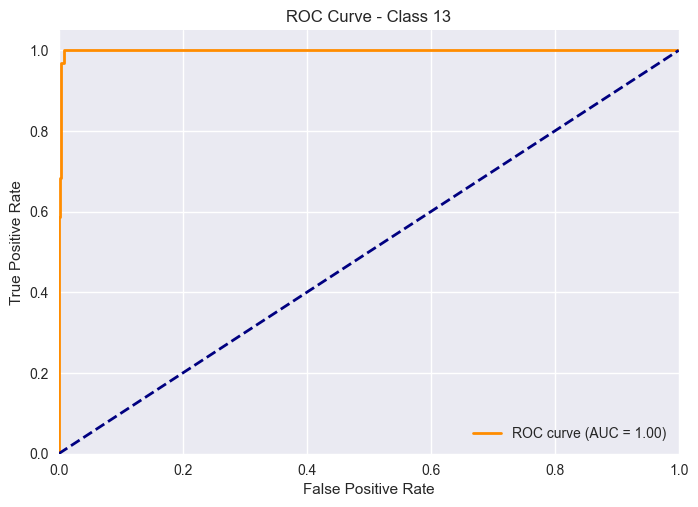

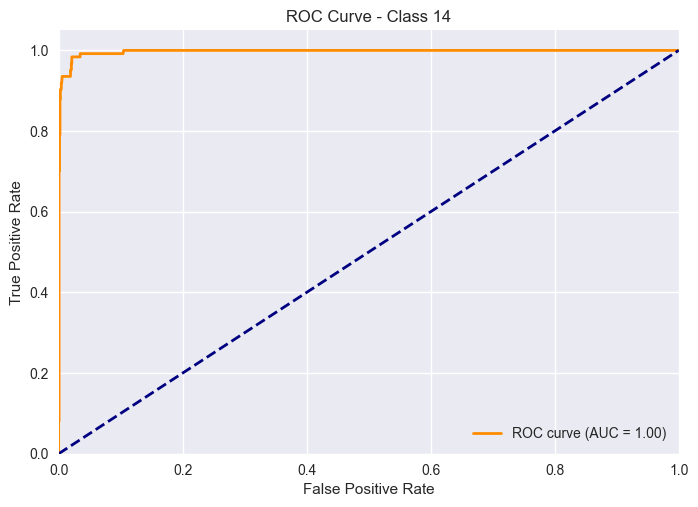

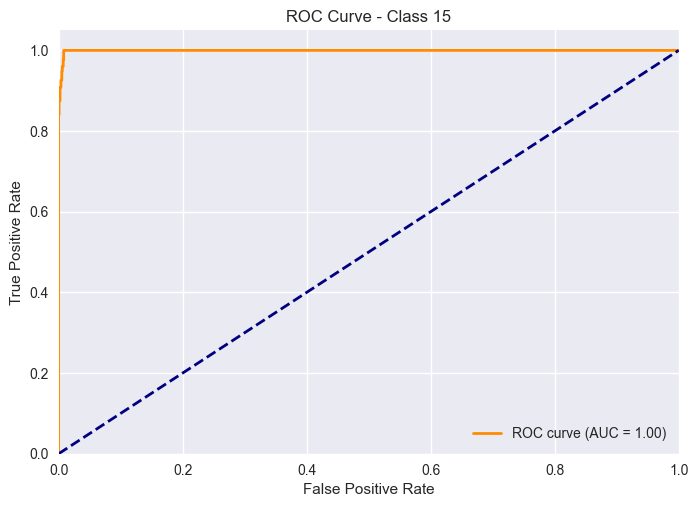

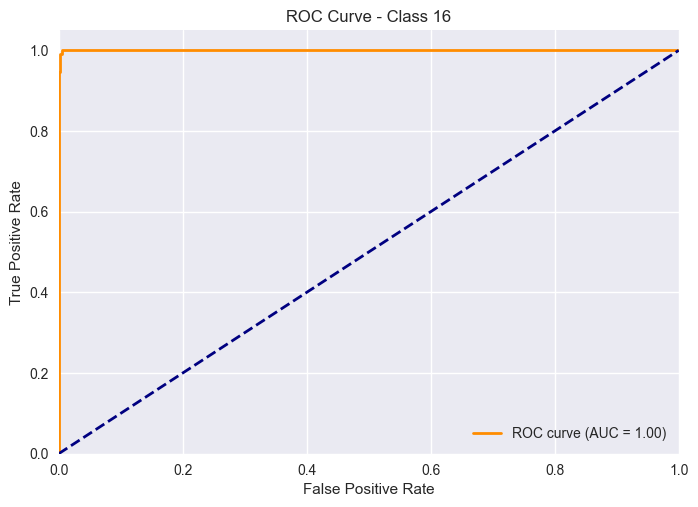

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# true_labels: Ground truth binary labels (0 or 1) for each class
# predicted_probs: Predicted probabilities for each class

# Compute ROC curve and ROC AUC score for each class
n_classes = true_labels.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Class {i}')
    plt.legend(loc="lower right")
    plt.show()


# Mas Valent

In [ ]:
import numpy as np

# Define the threshold (e.g., 0.5)
threshold = 0.5

# Your predicted probabilities (replace this with your actual predicted probabilities)
predicted_probs = np.array([0.7, 0.3, 0.6, 0.4, 0.8])

# Apply the thresholding
predicted_binary = predicted_probs.copy()  # Create a copy to avoid modifying the original array
predicted_binary[predicted_binary < threshold] = 0  # Set values below the threshold to 0

# Print the result
print(predicted_binary)

[0.7 0.  0.6 0.  0.8]


In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

print(pd.DataFrame(X))
print(pd.Series(y))

           0         1         2         3         4         5         6   \
0   -0.258203  1.019808  1.524563  0.617243  0.148243  0.744111 -0.363963   
1   -0.458166  0.828728 -0.656965 -0.056297  0.254895 -0.018241  0.313829   
2   -0.387378  0.761818 -1.310351 -0.351663 -0.130643 -0.641420  0.152001   
3   -2.394585 -0.036724  1.361228 -0.371470  1.871835 -1.226815  0.770733   
4    0.258229 -1.600952  1.101282  1.659578  0.927923 -0.093182 -1.778309   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.724879  0.281545 -0.362035 -2.602418  0.699501 -0.328376  0.383521   
996  2.085897  0.461640  0.372497 -1.838814  0.024923 -0.710831 -0.945424   
997 -0.547793 -0.674539 -0.834644  1.050191 -0.797763  0.699879 -0.943583   
998  0.559619 -0.625025  1.404538  0.593826 -0.270234 -0.519678 -1.407141   
999 -1.424876  0.527146  0.157864 -0.926648 -0.801353  1.825411  0.999557   

           7         8         9         10        11        12        13  

In [ ]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [ ]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
bert_probs

array([[0.002165, 0.002991, 0.00321 , ..., 0.003536, 0.967788, 0.001961],
       [0.003795, 0.00227 , 0.003473, ..., 0.002862, 0.947152, 0.003112],
       [0.002631, 0.002891, 0.003273, ..., 0.002888, 0.972064, 0.001958],
       ...,
       [0.95349 , 0.015354, 0.024014, ..., 0.032001, 0.012369, 0.027374],
       [0.021437, 0.009578, 0.005121, ..., 0.005769, 0.008345, 0.004639],
       [0.020053, 0.010131, 0.005102, ..., 0.00554 , 0.008664, 0.004678]])

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
pred_prob1[:,1][100]

0.009782163711238518

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

In [ ]:
print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


/tmp/ipykernel_1610757/1489870747.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


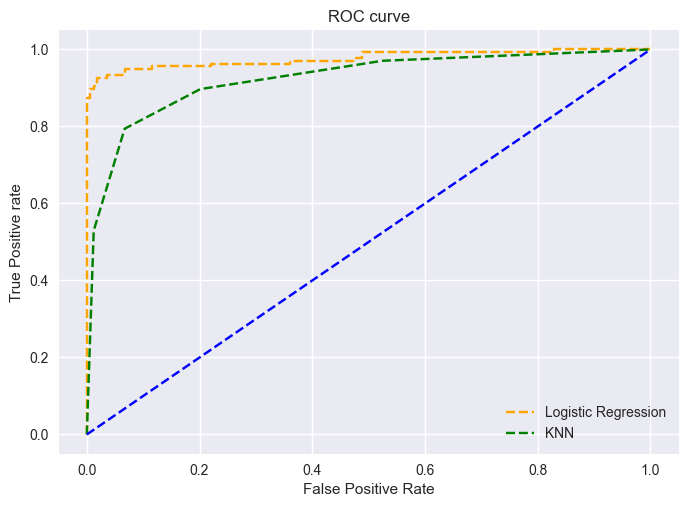

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()